<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Stochastics统计
# 主要是Monte Carlo method蒙地卡罗方法，通过统计模拟方法的的方法算出股价/期权/利率，在计算时将布朗运动用好多个乱数数组(通常是标准正态分布)来表示出来，因为numpy的向量运算，所以python可以大量处理这些数组，算出的结果是一个代表绝大多数可能性的数组(使用的乱数数值越大，模拟出可能的结果越多，越可能包含和反映出真实的结果)，最后在使用mean来获得最可能发生的结果(也可以不做，不做就直接对数组进行分析，一般期权定价需要做，因为这给期权定价提供了基础，但是股价/利率不做，因为这两个都是看结果的(结果可能发生小概率事件))。

In [1]:
import math
import numpy as np
import numpy.random as npr  
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

# Random Numbers生成乱数 

In [3]:
npr.seed(100)  
np.set_printoptions(precision=4) 

#### np.set_printoptions(precision=4) ，取出来的数都保留4位小数

In [4]:
npr.rand(10)  

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

#### npr就是numpy.random，取10个0到1均匀分布的随机乱数。

In [5]:
npr.rand(5, 5)  

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

#### (5, 5) 产生一个5 * 5的乱数矩阵：25个数。括号里面可以不断增加，会产生多维矩阵。:(5,5,5) —> 三维矩阵

In [6]:
a = 5.  
b = 10.  
npr.rand(10) * (b - a) + a  

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [7]:
npr.rand(5, 5) * (b - a) + a  

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

#### * (b - a) + a使函数能够在a到b之间取乱数。  0到1乘以距离，再加上起始点。可以在一维array也可以对矩阵使用。

In [8]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)  
rn2 = npr.randint(0, 10, sample_size)  
rn3 = npr.sample(size=sample_size)  
a = [0, 25, 50, 75, 100]  
rn4 = npr.choice(a, size=sample_size) 

### npr.randint生成随机整数(0, 10, sample_size) :0到9(不包括上限)的500个整数乱数；.sample相比npr.rand，功能相似，但是只能生成一维的array，不能生成矩阵；choice从list里面抓数字出来，每次抓取记录后放回数字，size=sample_size重复500次，npr.choice(a,是在a这个list里面抓数字，replace是npr.choice的参数，默认为False，就是抓取后放回，改为True之后就不放回了，但是出现抓取次数多于list里面元素个数的情况就会报错。

In [9]:
rn1

array([[0.2768, 0.2465, 0.1736],
       [0.9666, 0.957 , 0.598 ],
       [0.7313, 0.3404, 0.0921],
       ...,
       [0.1908, 0.5499, 0.522 ],
       [0.1489, 0.6885, 0.9105],
       [0.4814, 0.5752, 0.5589]])

In [10]:
rn2

array([8, 8, 1, 7, 8, 2, 5, 7, 9, 9, 2, 3, 1, 8, 0, 0, 7, 6, 8, 2, 5, 6,
       9, 0, 2, 2, 8, 3, 6, 8, 8, 5, 6, 1, 5, 9, 7, 1, 5, 3, 3, 4, 7, 7,
       9, 0, 5, 1, 8, 8, 3, 1, 9, 2, 6, 9, 8, 2, 8, 7, 4, 7, 2, 5, 9, 6,
       1, 6, 4, 1, 0, 3, 6, 5, 4, 3, 9, 0, 1, 1, 4, 2, 4, 8, 3, 9, 4, 5,
       8, 6, 0, 9, 3, 1, 6, 8, 4, 8, 6, 1, 9, 9, 5, 3, 0, 6, 8, 9, 5, 9,
       7, 4, 0, 3, 9, 3, 2, 6, 4, 2, 2, 3, 4, 2, 5, 5, 7, 5, 9, 7, 6, 0,
       1, 3, 3, 0, 0, 0, 0, 1, 0, 1, 6, 0, 1, 8, 0, 1, 7, 4, 2, 4, 0, 8,
       5, 7, 2, 2, 1, 2, 7, 4, 8, 7, 2, 1, 6, 1, 2, 1, 8, 4, 7, 4, 0, 5,
       3, 8, 9, 2, 5, 9, 4, 8, 6, 8, 9, 1, 6, 0, 4, 2, 5, 8, 4, 3, 9, 4,
       5, 1, 7, 5, 5, 3, 8, 6, 5, 7, 4, 6, 0, 7, 2, 5, 2, 7, 5, 1, 2, 2,
       2, 2, 4, 0, 5, 2, 6, 6, 7, 9, 3, 8, 5, 1, 2, 4, 8, 0, 3, 1, 1, 1,
       5, 8, 0, 9, 3, 6, 7, 8, 6, 5, 3, 8, 4, 3, 7, 1, 3, 6, 1, 1, 1, 8,
       6, 2, 8, 4, 3, 2, 9, 8, 0, 4, 7, 1, 7, 1, 5, 2, 5, 8, 9, 7, 0, 6,
       5, 6, 2, 4, 5, 6, 9, 1, 3, 6, 3, 5, 4, 7, 5,

In [11]:
rn3

array([4.8438e-01, 1.8013e-01, 7.3534e-01, 3.2377e-01, 1.2203e-01,
       2.5229e-01, 4.0451e-01, 5.8591e-03, 2.3865e-01, 5.2481e-01,
       4.9918e-01, 5.6289e-01, 3.2396e-01, 4.2265e-01, 9.4205e-01,
       6.1739e-01, 5.7783e-01, 3.5242e-02, 7.0204e-01, 4.9381e-01,
       5.8445e-01, 1.3390e-01, 4.1797e-01, 9.7747e-01, 7.3502e-01,
       6.6508e-01, 3.6248e-01, 5.6560e-01, 4.4799e-02, 3.7972e-01,
       9.6955e-01, 1.9504e-01, 4.0211e-01, 8.5712e-01, 1.7264e-01,
       6.6818e-01, 5.8514e-01, 5.3124e-01, 9.4453e-01, 4.6765e-01,
       8.5327e-01, 5.3845e-01, 2.5812e-02, 7.2625e-01, 2.6286e-01,
       6.2548e-01, 7.6903e-01, 8.8715e-01, 1.6080e-01, 8.0656e-01,
       7.5313e-01, 3.2239e-01, 6.0635e-01, 9.4959e-01, 1.7706e-01,
       8.8331e-01, 1.9863e-01, 6.4680e-01, 6.0833e-02, 3.6494e-01,
       9.5819e-01, 4.2130e-01, 4.4311e-01, 5.6054e-01, 4.4350e-01,
       2.9600e-01, 1.2029e-01, 3.8311e-02, 2.9602e-01, 6.8397e-02,
       3.7016e-01, 6.0754e-01, 1.6841e-01, 3.8279e-01, 6.6298e

In [12]:
rn4

array([ 75,   0,  50,   0,  50,  50,  50,  25,  75,   0, 100,   0,  25,
       100, 100,  75, 100,  25, 100,  50,  75,  75,   0,  50, 100,  50,
        50, 100,   0,  25,  75, 100, 100,   0, 100,  25,  75, 100,  25,
         0, 100,  75,   0,  25,  25,  50,  75,  25,  25,   0,   0, 100,
        75,   0, 100,  75, 100,   0,   0,  75,  50,   0, 100, 100,   0,
        25,  50,  25,  50,  25,   0,  25,  50, 100,  25,   0, 100, 100,
        25,  25,   0,  75,  25,  50,  50, 100,  75,  50,  50, 100, 100,
        50,  50,  75,  75, 100,   0,  25, 100,  75,  25,  75, 100,  25,
        75,  75,   0, 100,  75,  50,  25,  75,  75,   0,  75,  25, 100,
        50,  25,  25,  75,  75, 100,  25,   0, 100,  75,  50,  75,  50,
       100,  50,   0,  50,  25,   0,  75,  50,  25,   0, 100,  25,  75,
       100,   0,  50,  75,   0,   0,  75, 100,  75,  25,  25,  25,  25,
       100,  50, 100,  25,  75,  25,  50,  50,  50,  50,  50,   0,  50,
       100, 100,  50,   0,  50, 100,   0, 100,  50,   0,  50,  2

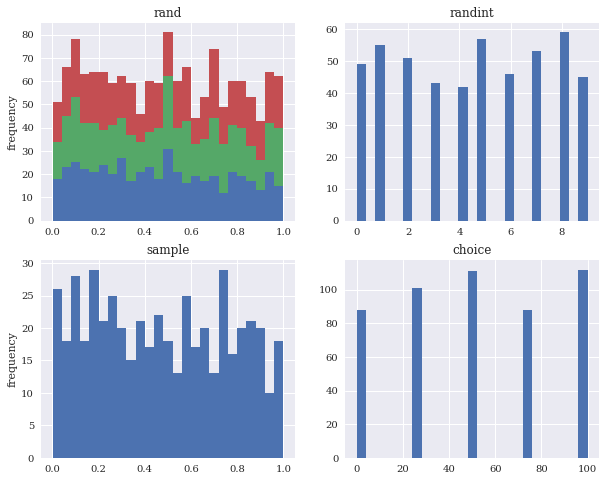

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice');
# plt.savefig('../../images/ch12/stoch_01.png');

### subplot里面的nrows=2, ncols=2是设置一行和一列里面有几个子图，((ax1, ax2), (ax3, ax4)) = 这种方式可以直接确定每个子图的子图矩阵的位置，hist里面的stacked=True，对于矩阵的形式，有3列，意味着是3个bar，bar叠加起来；randint和choice生成的数值是间断的，图像上看bar和bar中间有较大的空隙。bins的作用是分群，而对于间断点，如果点的数量高于bins的数量，分群还有意义；对于连续值，分群是具有重要意义的，抽出25个bar。

In [14]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)  
rn2 = npr.normal(100, 20, sample_size)  
rn3 = npr.chisquare(df=0.5, size=sample_size)  
rn4 = npr.poisson(lam=1.0, size=sample_size)  

### npr.standard_normal是标准正态分布，括号里面只需要输入需要生成的样本点的数量；npr.normal是生成正态分布，默认标准差是1，平均数是0，符合标准正态分布，可以更改参数生成出不一样的正态分布；npr.chisquare是卡方分布，很多正态分布的加总就是卡方分布，df是自由度degree of freedom；npr.poisson珀松分布：单位时间(或单位面积)内随机事件的平均发生次数，泊松分布的期望和方差均为lam，需要输入lam和生成数量。

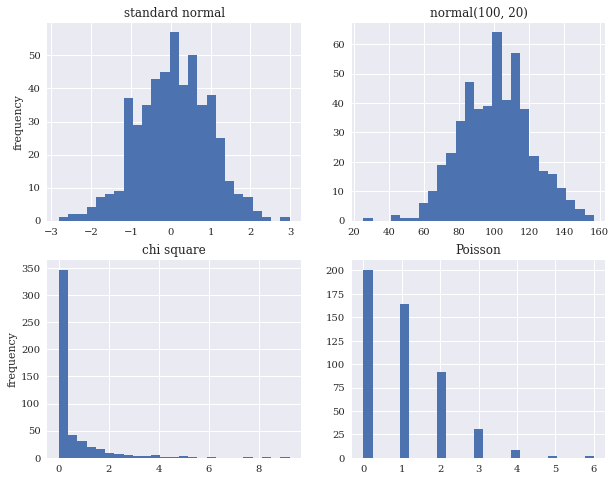

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');
# plt.savefig('../../images/ch12/stoch_02.png');

### 不同分布的hist分布图，标准正态分布的重要事件发生在0mean值附近，而改过标准差和平均数的正态分布出现了一侧发生的概率远高于另外一侧，同时平均数不在0处了，而是移到了100处；卡方分布是从0开始，集中在0处，随着数值的增加频数呈现出先快后慢的下降情况，从图中估测，如果计算平均数大致会在0.5处(df = 0.5)；珀松分布是间断分布，从图中估计，平均数是1，因为图中是随着值增加频数是先快后慢的下降趋势。

# Simulation模拟

# Random Variables随机变量，连续情况下算股价

### 模拟的是衍生品价值的预测，在风险中立(所有投资人无风险偏好，对于所有的利率都是无风险利率，所有的资产都是一视同仁，不会在风险上有所差别)的前提下，ds/s =  rdt 基础:在细分后的极短时间里面的股价报酬率等于无风险利率乘以时间;考虑到市场上的波动需要在之前的基础上加上σ * dz, σ是波动率，dz是关于布朗运动的函数。最后得出的式子，考虑了无风险利率和市场波动率(风险)，是趋近于真实市场资产报酬率的式子。
### 布朗运动反应波动，本身是波动极大的，函数曲线是崎岖不平的，所以不管再怎么切割出一个细小的区间，在区间里面，函数都是波动的折线，所以牛顿微积分公式无法使用。例:日K线和年K线不会因为区间的缩小而改变K线崎岖不平的性质。
### 需要对ds/s =  rdt + σ * dz公式两边做积分，结果就是St = S0 * e^((r - 0.5σ^2) * t + σ * t^0.5 * ζ) , r是无风险利率，St是预计t时间之后的报酬率，t是时间，σ是波动率，ζ是需要标准正态分布抽取的乱数。算出来的结果是n个报酬率组成的数组，因为ζ要符合布朗运动的随机性，所以是随机抽出的正态分布数放入公式，计算出最后的数组。

In [16]:
S0 = 100  
r = 0.05  
sigma = 0.25  
T = 2.0  
I = 10000  
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
        sigma * math.sqrt(T) * npr.standard_normal(I))  

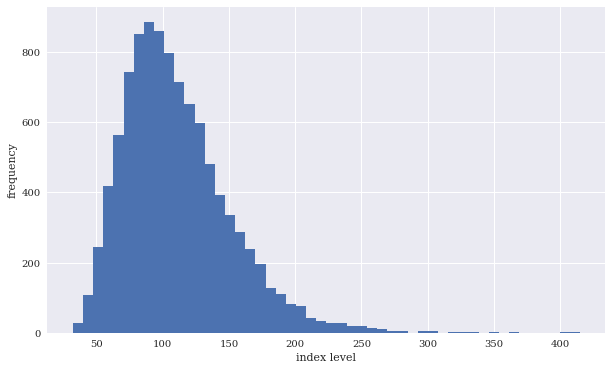

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_03.png');

In [18]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)  

### lognormal是直接从对数正态分布数中抽取1000个符合性质的数(对这个数组取过ln之后的数组符合正态分布的)，((r - 0.5 * sigma ** 2) * T, sigma * math.sqrt(T), size=I)：前面的是mean值：(r - 0.5 * sigma ** 2) * T，后面的是标准差：sigma * math.sqrt(T)。

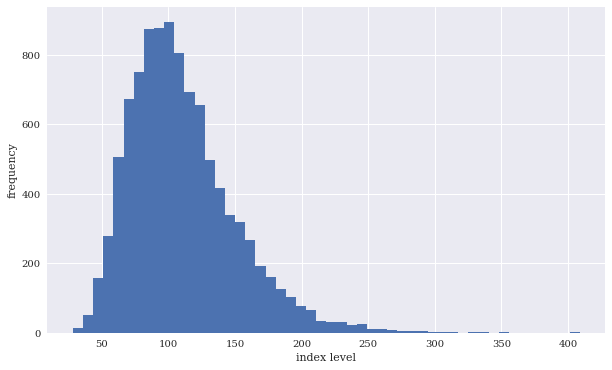

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_04.png');

### 看得出来，对数正态分布数和正态分布数的分布是一致的，趋向于正态分布的形式;两种方法是有本质区别的，一个是将随机乱数带入式子进行array的计算，得出的数组；另一个是直接从lognormal这个数据库里面抽取10000个符合描述出来的平均数和标准差的对数正态分布数组。虽然标准差和平均数是从公式里面推导然后算出来的，但是是单一的数，没有经历过随机数组的计算，所以结果相似，但是会有差别。

### 股票报酬率是正态分布，则股票价格就是对数正态分布(取了对数之后的数组会是正态分布)，
### ln（St / S0) = ln(e^((r - 0.5σ^2) * t + σ * t^0.5 * ζ)) = (r - 0.5σ^2) * t + σ * t^0.5 * ζ)
### (r - 0.5σ^2) * t + σ * t^0.5 * ζ)就是连续报酬率的表达式，也是正态分布。
### 上图是可能股价的分布图，特点是所有值在大于0的部分，右偏正态分布，有长尾的特点。

In [20]:
import scipy.stats as scs

In [21]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)  
    sta2 = scs.describe(a2)  
    print('%14s %14s %14s' % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

#### ,代表一个空格，将两个str或者是float隔开，体现在print上，用,隔开的两个元素之间有一个空格，不受%14s里面的蓝框数的限制。多个print之间会自动另起一行。

#### sta2[1][0]是找describe结果里面的第二个数，但是第二个数是minmax=(29.290566806218532, 387.4074911679515)，是一组数，所以[1][0]就是这一组数里面的第1个。

In [22]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


In [23]:
scs.describe(ST1)

DescribeResult(nobs=10000, minmax=(32.327413320668036, 414.8249840744002), mean=110.73049708608794, variance=1624.0682477710163, skewness=1.1217111713960446, kurtosis=2.4380211680436146)

In [24]:
scs.describe(ST2)

DescribeResult(nobs=10000, minmax=(28.22992615556129, 409.1095568899269), mean=110.43059955609392, variance=1590.2354930842916, skewness=1.1151549867821533, kurtosis=2.2174112543684856)

# Stochastic Processes随机过程

# Geometric Brownian Motion几何布朗运动(离散化股价模型)

In [25]:
I = 10000  
M = 50  
dt = T / M  
S = np.zeros((M + 1, I))  
S[0] = S0  
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * npr.standard_normal(I))  

In [26]:
S0

100

### 因为连续时间变化是一瞬间的(有无穷多的下一瞬间)，每一个点在预测的时候都引入随机乱数，所以对于连续时间来说在每一瞬间模拟出对应值是不可能的(因为需要抽取无穷多的乱数)。所以需要离散化。

### 离散是连续的反义词，直观上说，离散化就是将连续的线变成间隔的点，方法就是将连续时间分段，每段算出对应的数值，而这个数值代表所在的区间，因此，连续的时间被切断，成为有限个点。

### 离散化处理后的公式就是:St = S(t-Δt) * e ^((r - 0.5 * σ ^2) * Δt + σ * Δt^0.5 * ζ):将t替代为Δt.

### M = 50将0到t之间切割成50份；I = 10000生成1000条股价变化的情况；dt = T / M ：dt就是每份时间的长度；
### S = np.zeros((M + 1, I))生成51 * 10000的矩阵，矩阵里面是0，方便后面填入。S[0] = S0, 给第一列赋值，初始化S0为100.
### 一横一竖，交叉出了两个计算的loop，但是由于numpy的向量化运算，所以可以只需要控制时间轴不断向前推进，只需要写一个loop：for t in range(1, M + 1):。
### 推进后自动计算出当前时间段的10000个结果。所以在做索引时，可以直接写0到50加:,不需要加10000个列里面的数字，代表切片取数会针对所有在这个时间段里面的10000个曲线(值)。

In [27]:
S.shape

(51, 10000)

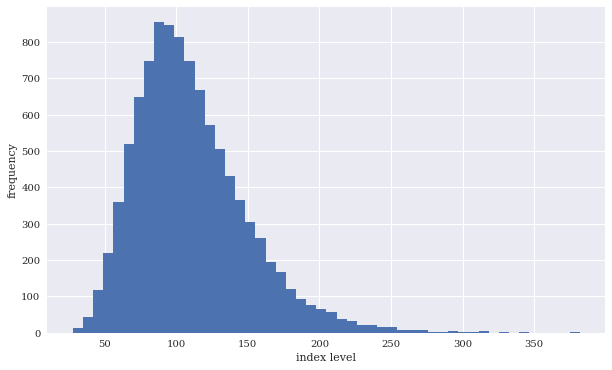

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_05.png');

#### S[-1] = S[50]对数组的最后一行做hist图，因为要看最后一阶段(变化完成后)的10000股资产的价值。

#### 看得出来是符合正态分布的，因为抽取最后的乘数ζ的时候是从正态分布的数组里面抽出的。

In [29]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.423        110.431
           std         39.179         39.878
          skew          1.069          1.115
      kurtosis          2.028          2.217


### 看得出来，离散化的函数在取值后还是和连续情况下求出的分布是大致相同的。

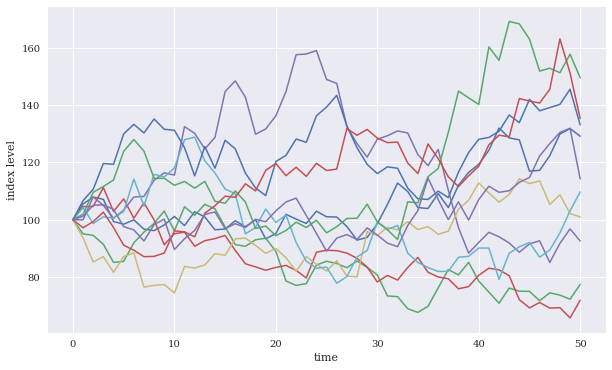

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');
# plt.savefig('../../images/ch12/stoch_06.png');

### S[:, :10]抽出前面10条股票的股价，画图。看得出来是折线图，因为离散化后是分区间的，有间隔的50个点，

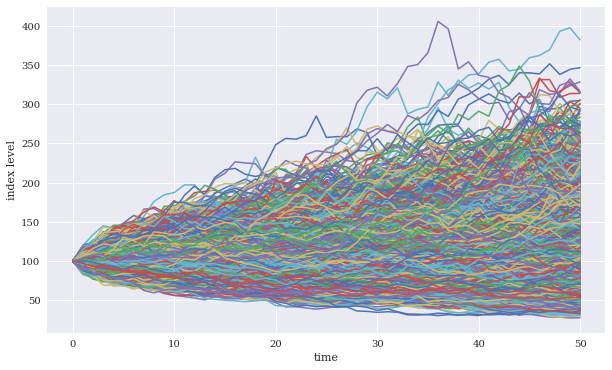

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

#### 看出除了少数几条在t点处达到了350的高值，大多数还是集中在S0处100，没有亏也没有赚，往上走的曲线逐渐稀疏，说明极少有股票可以大赚，同时亏钱也在0到100之间，下降快速，相比增长的缓慢。

# Square-Root Diffusion平方根扩散(算利率)

## Cox-Ingersoll-Ross (CIR) 模型描述了利率的演变。它是一种“单因素模型”（短期利率模型），因为它将利率变动描述为仅由一个市场风险来源驱动。CIR 模型指定瞬时利率rt遵循随机微分方程，也称为 CIR 过程.特征是算出来的利率不会是负数，符合常识和预期。但是在很多发达国家，比方说北欧或者日本，他们的存款利率是负数(会使用另外的方法去实现)。

### 公式： dr = k (θ - r) * dt  + σ * r^0.5 * d(z1), dr是极短时间里面利率低变动；
### 前半部分k (θ - r) * dt是固定的(只随着时间变化，反映到曲线上，就是在不同利率曲线上的这一部分值是固定不变的)，后半部分σ * r^0.5 * d(z1)有随机的参数d(z1)
### θ是剔除波动的利率长期平均水平，如果r>θ，k参数就会把差值缩小，使r往下降，r趋向于θ(此时的k (θ - r) * dt是正数)；如果r<θ，k参数就会把差值缩小，把r往上升，r趋向于θ(此时的k (θ - r) * dt是负数)。k的数值是用来缩小(θ - r)绝对值差距的一个固定的数值较小系数。
### 可以得出利率如果太高(相比长期平均)会经济过热，然后进入紧缩，最终利率下降；同样利率如果太低会有上升的空间(企业会增加融资)，经济复苏，然后利率上升，回归到长期平均水平。
### 在这个模型店基础上也可以使前半部分变成有波动的，因为θ可以考虑不断更新市场数据，变成θt，更新到目前时间获得的长期平均利率，可以通过rolling的方式。
### σ是波动率，d(z1)是极短时间内，布朗运动的增量。
### 股价公式的表达式是ds/s，就是变动量除以当前的股价，获得的是股价的报酬率；但是dr表示代表的就是极短时间里面的利率变动量，不需要再和自身相除。
### 模型本身的结果不会是负数，前半部分通过k来保证相乘之后肯定为正，后半部分根号出的结果也肯定是正的。

## -----------------------------------------------------------------------

### 针对CIR模型的离散化有不同的解法，原则是不违背在连续时间内运行的基本原理的前提下减少数据的磨损。

### 书里面的方法是：
### 设定区间s到t(s, t), dr = rt -rs; rt = rs + k * (θ - rs+) * Δt + σ * rs+^0.5 * Δt^0.5 * ζ
### rs+j就是max(rs, 0), 取出正数; Δt = t - s

In [32]:
x0 = 0.05  
kappa = 3.0  
theta = 0.02  
sigma = 0.1  
I = 10000
M = 50
T = 2.0 
dt = T / M

### x0就是rs; kappa就是k; theta就是平均利率水平θ; sigma是波动率σ; 10000个利率的走势线; T是两年; dt就是每个分隔间隔出的时间大小。

In [33]:
import numpy as np
import math
import numpy.random as npr
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] +
                 kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) *
                 math.sqrt(dt) * npr.standard_normal(I))  
    x = np.maximum(xh, 0)
    return x
x1 = srd_euler()

### for t in range(1, M + 1):写一个loop，把值算出来。

### x = np.maximum(xh, 0)在形成矩阵，算出xh之后，把xh里面是负数的项变成0.

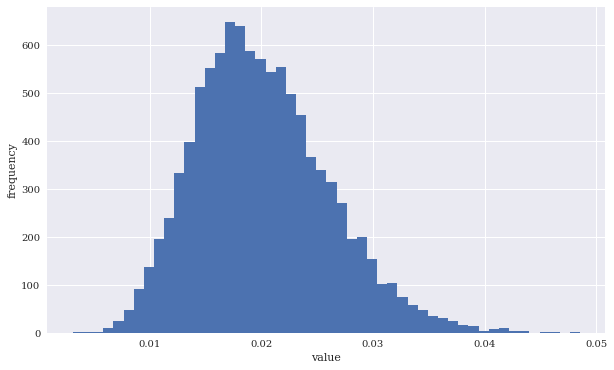

In [34]:
from pylab import mpl,plt 
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_07.png');

### x1[-1]抽出第50期(最后一期)的1000个股票看利率值分布

#### 趋向于mean为0.02的正态分布

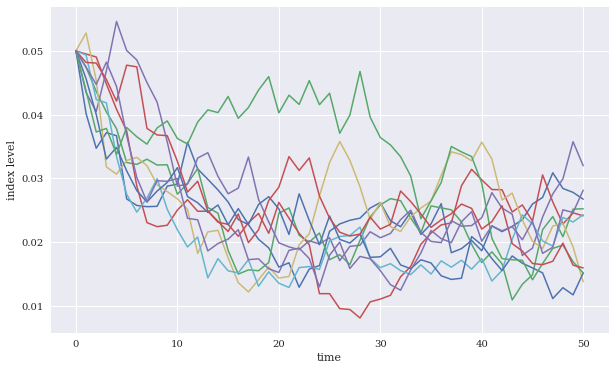

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');
# plt.savefig('../../images/ch12/stoch_08.png');

## 另一种方式获得实点t的利率是使用模拟，更加准确，相比之前的离散化方法(之前的完全是依靠直觉)，新的方法是有数学卷验证的结果。
## 直接生成Y:non-central chi-squared distribution非中心卡方分布，分布的自由度是4kθ/σ^2, 公式为2c * rt * e^(-k * T), 也就是（4k * e ^（-kΔT)) * rt/ σ^2 * (1 - e^-kΔt)。
## 然后对Y进行计算: rs = Y/2c, 2c = 4k/((1 - e^-k * T) * σ^2)
## 最后的式子是((1 - e^-k * T) * σ^2)/4k * λd（4k * e ^（-kΔT)) * rt/ σ^2 * (1 - e^-kΔt)）：λd的自由度为4kθ/σ^2

In [36]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2  
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)  
        nc = np.exp(-kappa * dt) / c * x[t - 1]  
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)  
    return x
x2 = srd_exact()

### Y/2c也可以写成1/2c * Y, 分别算出两个不同的部分， c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)代表是1/2c。
### npr.noncentral_chisquare(df, nc, size=I)括号里面包括自由度和公式，还有要生成的随机个数。
### 公式nc = np.exp(-kappa * dt) / c * x[t - 1] 就是 rt * e^(-k * T)/c；* x[t - 1]是形成loop，前一个算出来的rt就是后一个的rs.从t到s。

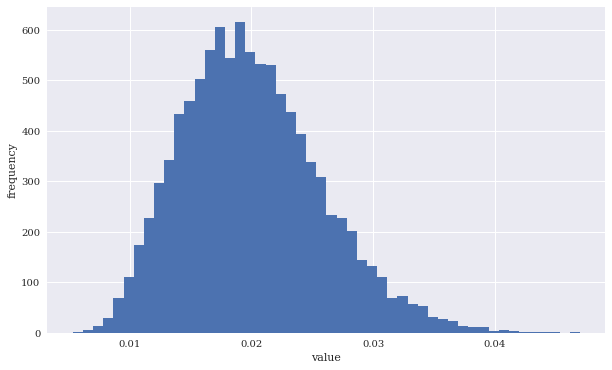

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_09.png');

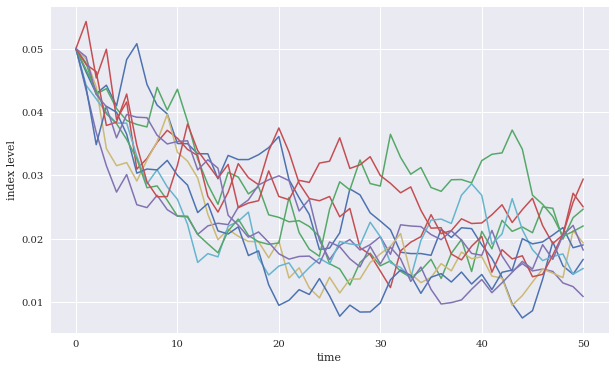

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');
# plt.savefig('../../images/ch12/stoch_10.png');

In [39]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.003          0.005
           max          0.049          0.047
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.529          0.532
      kurtosis          0.289          0.273


### 看得出来两个离散化出来的情况接近，前面的是按照直觉来自己依据连续情况下的公式推导出的结果，比较粗糙，会造成比较大的数据磨损，后面一个是按照数学家推出的基于非中心卡方分布模拟的公式，比较准确。

In [40]:
I = 250000
%time x1 = srd_euler()

Wall time: 645 ms


In [41]:
%time x2 = srd_exact()

Wall time: 1.03 s


In [42]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.003
           max          0.071          0.055
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.563          0.579
      kurtosis          0.492          0.520


### 相比之下，前面的方法更快，而且随着模拟量的增加，差距会缩小。

# Stochastic Volatility随机波动率(算股价，在波动率是乱数的情况下)

### 之前对股价和利率的计算当中都涉及到σ波动率，这个波动率在模型中设定为固定的数值。但是实际上应该不会是固定的数值，之前算过的简单的rolling的方法可以算出一定视窗里面的波动率曲线(在第3节课/代码第1章)，可以看出波动率是趋向于在处于高处时下降，处于低处时上涨(存在恢复长期平均值的特性)：
### 波动率反应的是市场的风险，风险会跟随市场的变化而变化(风险高的时候大多数人会购买避险的保险金融保险产品，导致市场上整体风险下降；而风险低的时候大多数人会倾向于采取激进的投资策略，市场上整体风险上升)

### 利率也符合恢复长期平均值的特性，所以公式上会比较相似，dσ = k(θ - r)dt + s * σ^0.5 * dz; 因为是研究波动率，所以原来在利率公式里面的σ波动率就被s替代，代表波动率函数的波动率: σ的σ。波动率也是绝对正值：波动率相当于是动态财务数据的标准差，反映一段时间里面数据的差异程度，而标准差肯定是正数。

### 存在可能将σ的函数带入ds/s股价的函数中去，形成一个更准确的公式，考虑了风险的变化
### ds/s =  rdt +  k(θ - r)dt + s * σ^0.5 * dz2 * dz1
### 因为有两个布朗运动，所以会抽取两次正态分布乱数，分别用dz1和dz2表示，同时考虑到两个乱数可能存在相关，所以在抽取前要确定两组乱数的cor相关系数为pdt(p为0到1中间的数).本次设定为0.6.
### 关于抽取乱数，目的是使两组数的var(方差都为1)，但是不相关(corr = 0); 所以开始准备一个符合var为1，而相关系数corr为任意固定值(0到1之间)的标准正态分布的乱数，然后通过Cholesky分解(多元)或者直接目测的方式计算，以获得一个它的转置矩阵，而这个转置矩阵里面ζ1和ζ2之间的corr是0，ζ1 = ζ1T，ζ2  = 0.6 ζ1T + 0.8ζ2T，
### corr（ζ1T， 0.6 ζ1T + 0.8ζ2T) = 0.6, 同时符合var（ζ1T， 0.6 ζ1T + 0.8ζ2T) = 1。
### 所以下面的一个参数肯定是0.6因为corr  = 0.6, 另外一个是0.8，因为var : 0.6^2 + 0.8^2 = 1

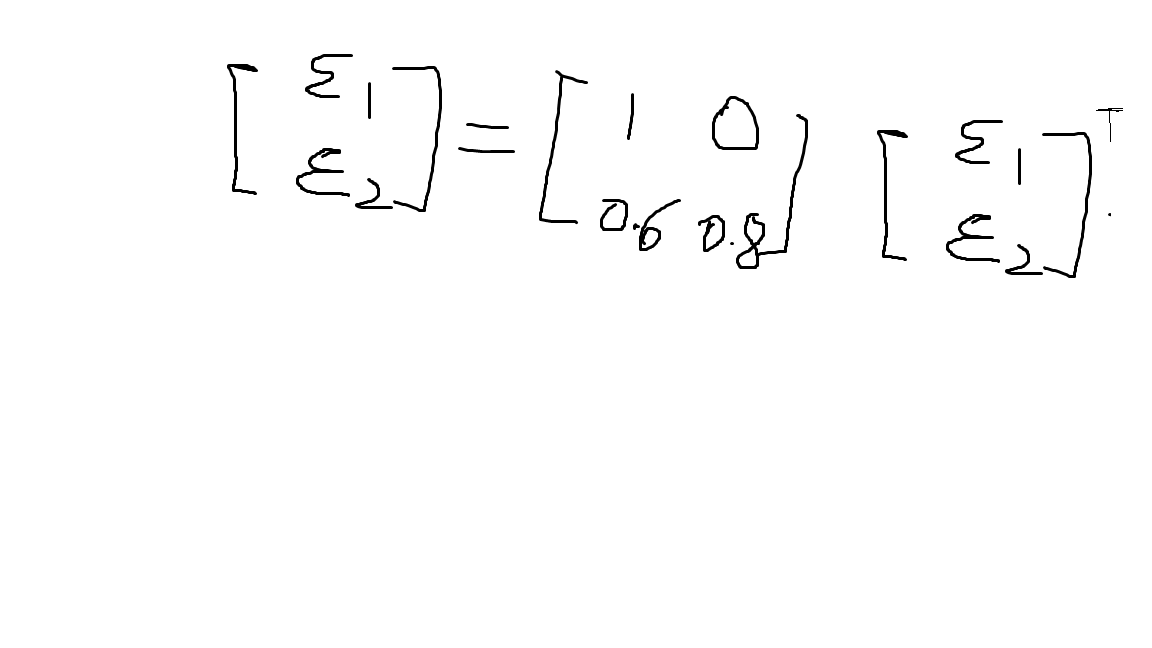

### 离散化: σt = σt-1 +k(θ - σt-1+) dt + s * σt-1 * Δt^0.5 * ζ1
### st = st-i * e^((r - 0.5 * σ)dt + σt^0.5 * Δt^0.5 * ζ2)

In [43]:
S0 = 100.
r = 0.05
v0 = 0.1  
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6  
T = 1.0

In [44]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat =  np.linalg.cholesky(corr_mat) 

### np.linalg.cholesky对矩阵进行cholesky计算，就是为了从已经产生的矩阵里面抽出一个满足行间corr为0的转置矩阵，按需要运算的数组的个数(组成矩阵的列数)，形成一个n * n的矩阵，矩阵的主对角线是1，第一行第二列和第二行第一列是corr的值0.6.cholesky可以在不需要输入具体数列的情况下，依据corr组成的矩阵拟合出之后计算所需要使用的中间矩阵。

In [45]:
cho_mat  

array([[1. , 0. ],
       [0.6, 0.8]])

In [46]:
M = 50
I = 10000
dt = T / M

In [47]:
ran_num = npr.standard_normal((2, M + 1, I))  

### npr.standard_normal((2, M + 1, I))，2个51 * 10000的标准正态分布矩阵，51个点构成50段时间。

In [48]:
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)

In [49]:
vh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### np.zeros_like形成一个51 * 10000的零矩阵，复制一下出来v和vh

In [50]:
v[0] = v0
vh[0] = v0

In [51]:
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])  
    vh[t] = (vh[t - 1] +
             kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
             sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * 
             math.sqrt(dt) * ran[1])  

### ran = np.dot(cho_mat, ran_num[:, t, :]),矩阵计算；cho_mat前面的是相对小的矩阵或者向量，ran_num[:, t, :]后面是大的，
### [:, t, :]是对应(2, M + 1, I)，就是两边两组数取尽，中间的t随着loop的变化而变化，一个t会做出2 * 10000次计算。
### 经过矩阵乘出来的是var方差为1，符合标准正态分布，同时两组矩阵的corr相关性为0的一个全新的矩阵.

In [52]:
v = np.maximum(vh, 0)

In [53]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

### np.zeros_like生成shape为51 * 10000的零矩阵。
### v = np.maximum(vh, 0)利用之前生成的零矩阵来填入正数和0数值，避免出现负数。
### S[0] = S0，51列里面的第一列为100.

### ——————
### 整体上看是前面的v和vh矩阵里面本来是0，同时通过dot运算使ran = np.dot(cho_mat, ran_num[:, t, :])，ran为ran_num矩阵里面两个矩阵中一个和cho_mat相乘的结果(两个不同函数里面的ran数组相互之间corr为0)，
### 前面的式子是在计算波动率的数值，只用到了ζ1一个乱数数组，算出来的结果填入vh(因为波动率一定要是正数，所以需要v来把vh里面的负数替换成0，通过maximum的方法)； σt = σt-1 +k(θ - σt-1+) dt + s * σt-1 * Δt^0.5 * ζ1
### 下面的是计算股价st = st-i * e^((r - 0.5 * σ)dt + σt^0.5 * Δt^0.5 * ζ2)，需要先算出来的波动率数组，同时用到之前算出的乱数ran_num，生成一个0矩阵S，大小还是51 * 10000，用波动率数组算出股价，然后填入S矩阵里面。(因为股价本来就可能上涨下降，不需要考虑正负号，所以不需要再生成新的0矩阵来进行maximum的操作)

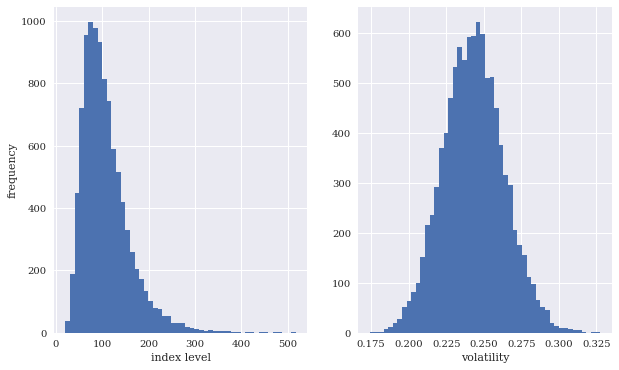

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility');
# plt.savefig('../../images/ch12/stoch_11.png');

### 画图的S[-1]是将最后一期(50期)的1000条股价曲线取出来，而v[-1]是将波动率最后一期取出画图。
### 看图可知股价的分布是围绕100的，左侧是股价下跌，看得出来频率的下降速度很快，函数整体上大于0(没有在负轴上存在数据)，而增长是先快后慢，一直延伸到快500，说明增值也是主要集中在100附近，但是增值没有限制，所以可以一直增加到很大的数值，但是频率就很低(长尾)。
### 波动率是集中在0.25前后，有明显的non-central chi-squared distribution非中心卡方分布的特征，和利率函数的图像非常相似。因为都是存在恢复长期平均的特性。

In [55]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.556          0.174
           max        517.798          0.328
          mean        107.843          0.243
           std         51.341          0.020
          skew          1.577          0.124
      kurtosis          4.306          0.048


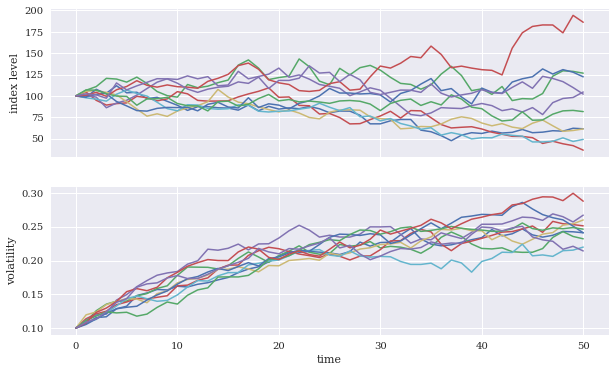

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility');
# plt.savefig('../../images/ch12/stoch_12.png');

### 从横向看从1到51的区间里面，截取10个曲线，看得出来股价模型有的曲线可以增长的很快，增长到较大的数值(后尾的特性)；而波动率的曲线趋向于0.25.

## a closed-form solution for options with stochastic volatility参考教材

# Jump-Diffusion跳跃扩散(算股价，在出现跳跃(突发事件)的情况下)

## Option pricing when underlying stock returns are discontinuous参考书

### 连续性函数简单说就是把笔一直放在纸上，从Y0到Y1一直画，笔头一直不离开纸。
### 但是很多金融资产的表现形式都不是传统的连续性函数，会有跳跃的情况。
### Jump-Diffusion混合了两种定价技术：一种是更传统的扩散模型，在这种模型中，因素以平稳和相对一致的方式发挥作用；另一种是跳跃过程模型，在这种模型中，一次性事件会引起重大变化。
### 重大变化类似于对汇率市场，一种币值高且走势是增高的货币(比如说欧债危机后的瑞士法郎)突然和一种币值低且走势是下降的货币(比如说欧债危机后的欧元)按一个低于市场的比例进行挂钩，会导致汇率市场出现断崖式的变化。(这就是一次性的最大变化)。类似于黑天鹅事件。

## ---------------------------------------------------------
# dS/S = (r - E(k)λ)dt + σdZ + JdN
# (r - E(k)λ)dt是固定项(仅仅随时间变化)，σdZ是考虑到布朗运动的波动情况，σ是固定值(也可以进一步细化为波动数组，但在这个问题里是固定的)，JdN是两个数组相乘的结果，代表一次跳跃强度的数组是对数正态分布数组J，而代表是否发生跳跃的珀松分布数组是dN。
# JdN跳动项的加入会对报酬率有影响(相当于是汇率市场出现断崖式的变化)，但是理论上模型是建立在无风险利率的基础上的, 所以要对r进行调整，使r - kλ等同于是无风险利率，使模型能够进行下去.
# 而E(k)λ的数值也和数组J和dN对r的影响，所以取了两个数组的平均数相乘，E(k)代表单次跳动的强度，而λ代表在t时间里面发生的平均次数，E(k)λ代表所有跳动的平均情况，也可以命名为rj，代表所有的jump对r的影响.
## E(k)用来描述跳跃的单次强度，k是符合ln(1 + x)是一个N(Ej, ðj^2)的正态分布;(E是期望值，ð是标准差,标准差)的x数组的期望值。λ是珀松分布的期望值。两个期望值相乘，使变动的频率(是否发生变动)和变动的强度(大小)结合。对数正态分布控制大小，珀松分布控制次数。
## ð是标准差，ðj^2就代表方差。
## E(k)λ就是两个期望值的相乘，是平均来看总体上可能出现的跳跃的次数和强度的平均对r(时间段内无风险利率的平均值)的影响
## 对于跳跃的强度，不管跳跃有多大，Y0是100，假设连续函数到Y1的值是200，那么跳跃后的Y1值也是200，
## 例:在一年复利一次的情况下: 1 + r间 = e^ r连(r间就是Y1/Y0, r连就是ln(Y1/Y0)).推导出:ln(1 + r间) = r连，ln(1 + d) ~N(Ej, ðj^2).
## 整体上，连续时间的股价报酬率是符合正态分布的，所以相当于是ln(无间断(间断点之前的情况) + 跳跃的值/无间断(间断点之前的情况)) = 正态分布的数组(因为出现跳跃后的连续时间报酬率应该等于没有出现的情况，都是符合正态分布的)。
## 所以ln(1 + k)符合正态分布。x为跳跃的值/无间断(间断点之前的情况):跳跃对整体报酬率的影响。
## 那么1 + k就是符合对数正态分布：1 + x的期望值E(1 + k)就是e^Ej + 0.5 * ðj^2 ，那么E(k)就是e^(Ej + 0.5 * ðj^2) - 1.
## 所以E(k)λ就等于λ * (e^Ej + 0.5 * ðj^2^2),对于r值的修正，当出现跳跃时。

## 下面是对数正态分布的期望值和方差的推导，只不过计算跳跃情况下的股价并不需要算出D(k)，所以没有对D(k)进行计算，但是E(k)是必须的，因为需要算出跳跃强度的平均水平，k的集合能够表现出单次的跳跃强度，而1+k是符合对数正态分布的，所以涉及到了对对数正态分布的期望值的计算。
## 后面直接使用J函数的时候, 直接生成一个正态分布数组，再对数组做e^(Ej + ðj * N) -1, 当中的N就是生成的正态分布数组。计算后形成的新的数组就是J，它的平均数(期望值)就是E(k)也是E(J) = e^(Ej + 0.5 * ðj^2) - 1.

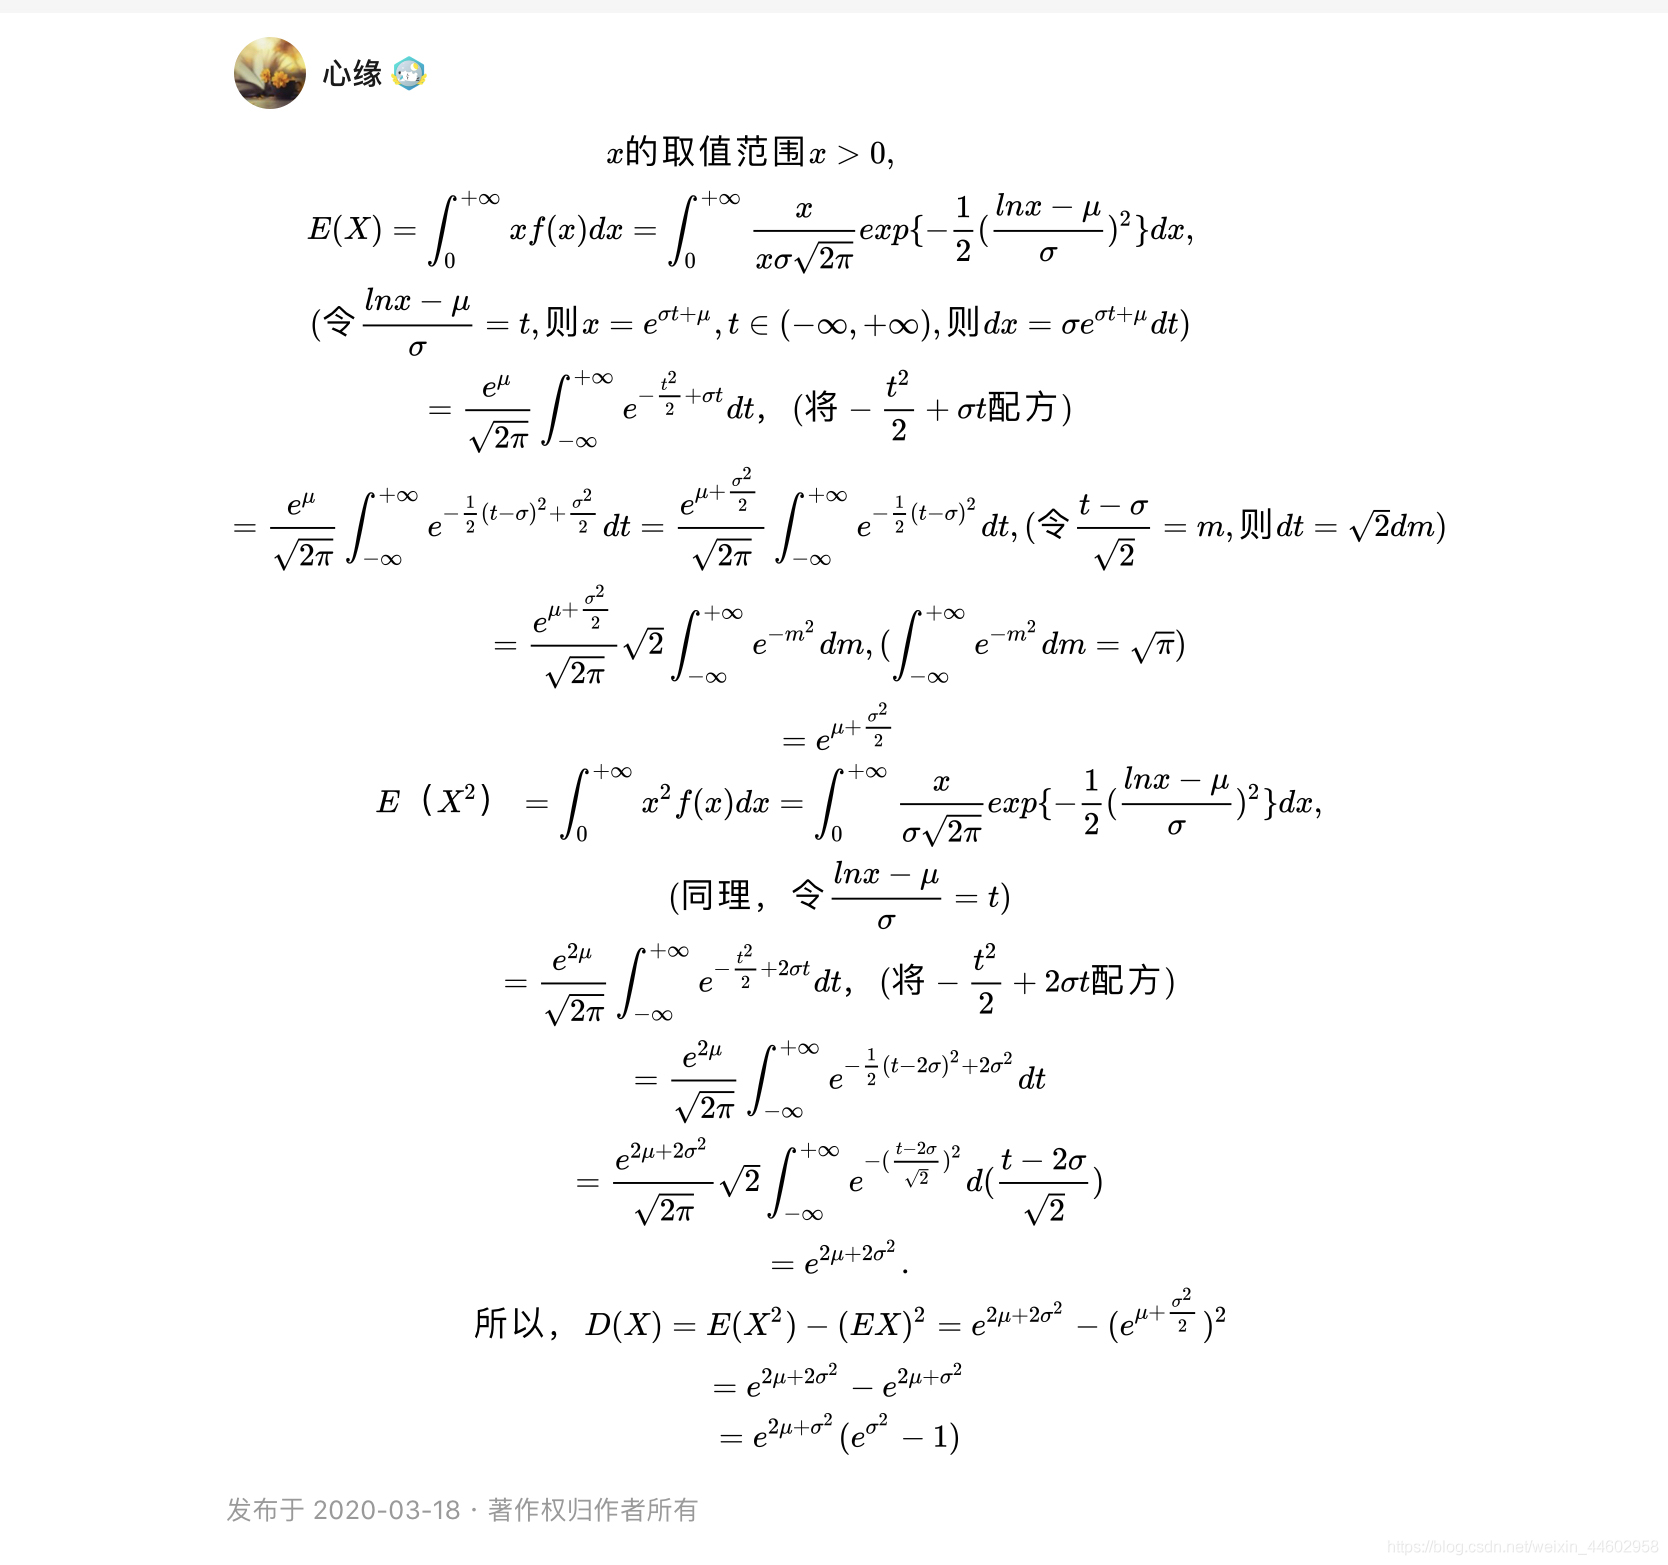

## ---------------------------------------------------------
## 如果没有跳动发生:dS/S = (r - kλ)dt + σdZ
## 如果发生了一次跳动：dS/S = (r - kλ)dt + σdZ + (Y - 1)
## Y - 1 = j(单次的变化值), Y = 1 + j(单次的变化值), j符合1 + x构成的对数正态分布，相当于是从对数常态分布里面抽出一个数，然后对它-1，得到最后的单次的变化值；
## 因为上面研究的是单次跳动的情况，如果出现多次跳动的情况就需要一个函数来控制跳动是否发生，这个函数就是输出0和1的珀松分布.
## dS/S = (r - kλ)dt + σdZ + (Y - 1)相当于是+ (Y - 1) * 1, dS/S = (r - kλ)dt相当于是+ (Y - 1) * 0
## 描述跳跃次数的数组是dN,而描述每次跳跃强度大的数组是J，J的数组会一直输出代表变化值的数字，但是绝大多数时间点里面的dN数组值为0(没有发生)，较少发生的情况数值为1，产生+ (Y - 1) * 1，从而产生跳跃。
## ---------------------------------------------------------
## 

In [57]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75  
mu = -0.6  
delta = 0.25  
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)  

In [58]:
rj

-0.3253254093758937

In [59]:
math.exp(mu + 0.5 * delta ** 2) - 1

-0.43376721250119166

In [60]:
(math.exp(mu + 0.5 * delta ** 2) - 1) * 105 + 105

59.45444268737488

## S0, r, sigma就是标准股价方程的T0期股价，无风险利率，股价波动率(波动率可以结合前面对波动率的波动方程式来进一步贴合市场的情况(会引入新的随机数))
## lamb就是λ，代表着跳动的次数，一年跳动0.75次。
## k是代表对利率修正每次跳动影响的对数正态分布数组，而mu是这个正态分布数组的平均数(期望值)，mu取值-0.6，代表设定的跳动基本上为不好的事件，会造成利率的下跌。delta就是ð，代表这个正态分布的标准差，体现数据的离散程度，0.25是相对比较小的一个标准差(小于标准正态分布的1)，说明这个数组还是比较集中在-0.6附近的。
## rj代表对利率调整的总公式，包括次数和变化量。
## lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) = λ * (e^Ej + 0.5 * ðj^2^2) = -0.325325
## math.exp(mu + 0.5 * delta ** 2) - 1就是E(k)，也是后面J正态分布数组平均数，J是代表单次强度的正态分布数组，后面生成数组的时候会使用到这个值: -0.43376721250119166
## 从E(k)的-0.4338的数额看，是一个比较激烈的下降，相当于是单次下降了40%的数值，hist的平均值也会变为59.45444268737488.

In [61]:
T = 1.0
M = 50
I = 10000
dt = T / M

## 离散化，将1年分为50份，生成10000个结果

In [62]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))  
sn2 = npr.standard_normal((M + 1, I))  
poi = npr.poisson(lamb * dt, (M + 1, I))  
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
                       sigma * math.sqrt(dt) * sn1[t]) +
                       (np.exp(mu + delta * sn2[t]) - 1) *
                       poi[t])  
    S[t] = np.maximum(S[t], 0)

### 都是先做出zeros0矩阵，来作为容器。
## for t in range(1, M + 1, 1):代表loop开始，对上述的3个数组矩阵进行运算，每次输入3个1 * 10000的数列，产出1个1 * 1000的数列，进行50次，从1(第一列)开始到51(第51列)结束，每次推进1单位.
## 公式里面出现了3个乱数的需求，2个标准正态分布sn1和sn2，1个珀松分布poi，目前假设3个数组之间不存在相关性corr = 0.(如果需要确保两个之间绝对没有相关性可以参考形成σ波动率函数使采用的矩阵运算的方法)
## S[t] = np.maximum(S[t], 0)，因为研究的是股价，负数的股价违反常识，但是由于研究的是跳跃，每次跳跃对结果值的影响很大(特殊情况)，所以计算出的结果可能为负(重大的负面事件突发)，需要每计算完1列就对列里面的数字进行检查，出现小于0的就替换为0.
## ↓↓↓↓↓↓↓↓↓↓↓↓离散化表达式

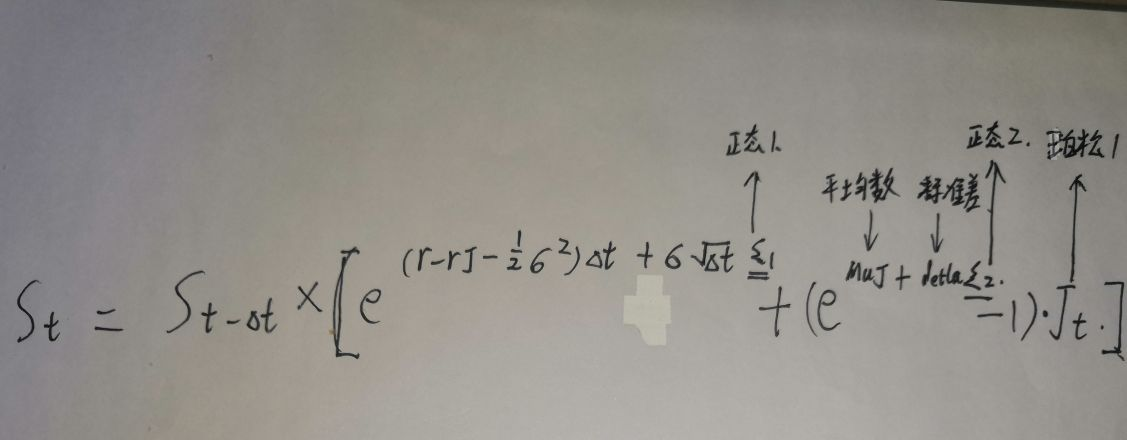

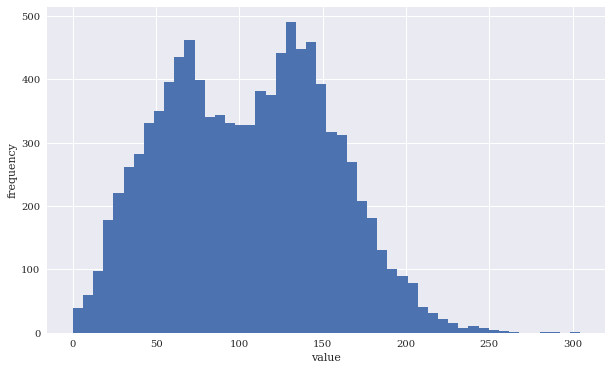

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_13.png');

In [64]:
S[-1].mean()

105.1267357637633

### S[-1]第51期的结果
## hist图为双峰，可以看出是jump对数据结果产生了影响，改变了原来的正态分布情况，
## 双峰的前一个峰是由jump形成的， 可以看出峰大致在60的位置，原因是设定的mu就是一个负数(-0.6), 可以肯定这个jump是一个负面的事件(会导致股价下跌)， 计算后得出的E(J)为-0.43..，代表着会下跌0.43，原本出现聚集的应该是在105的位置，这样，这个峰被出现的jump事件分走了，在105 * （1 - 0.43） =  60，的大致位置出现了一个高峰(分走的原来正态分布情况下105处的峰聚集)。
## 具体看，实际上后面的峰比前面的峰更高，这是因为，从一年的尺度看，最终数据的结果还是会回归到无风险利率的情况(平均数还是在100 * (1 + 0.05) = 105),。
## 所以为了回归到无风险利率的情况，需要平衡小于105的峰的数值，后面一个大于105的峰的高度需要在相对于105对称的位置，而且相对频率更高，使平衡后画出的hist能够在105的位置上起峰。

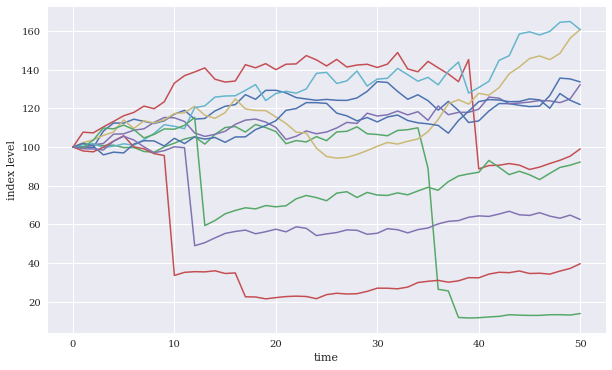

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');
# plt.savefig('../../images/ch12/stoch_14.png');

### 抓10个线(10个51 * 1的数列)
### 设定的波动次数是1年里面0.75次，对于10条线来说，理论上应该有7条左右到线出现跳动，目前看，图中有5条是明显有垂直式的下降的(发生的时间段不同)，接近于7条。

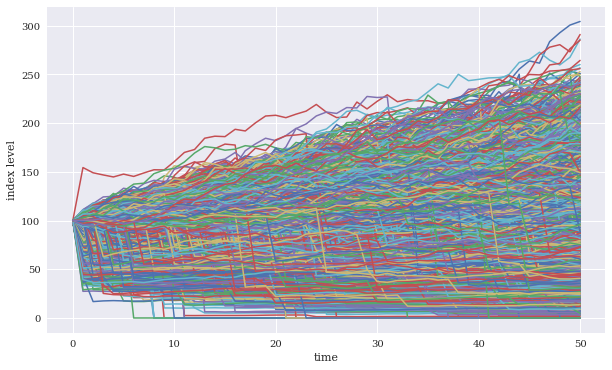

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

## 全部画出来，可以看到部分因为jump跌到0以下的之后的值就一直是0，没有办法涨回来，说明jump相比正常的波动对股价的影响是巨大的，在现实中就相当于是退市或者破产，股价也会全部归零

In [67]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * math.sqrt(T), size = 10000)

## 直接通过lognormal来拟合出没有出现跳跃的结果， 需要平均数和标准差。

In [68]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.000         46.476
           max        304.450        256.864
          mean        105.127        105.273
           std         49.454         21.453
          skew          0.131          0.624
      kurtosis         -0.680          0.860


## 对比可知，两组的标准差都在105左右，但是跳跃后的标准差更大，也意味着最大值更大，最小值更小。
## 未跳跃的最小值是42.046，是一个正数，但是跳跃的平均值是-60左右，意味着，可能出现最小值为负数的情况，而股价不能为负数，所以限制最小为0.
## 跳跃后的最大值会比未跳跃的大，因为是在平衡从而达到无风险利率的期望值105.
## skew 是偏度，因为是双峰，所以中间的部分比未跳跃的大，从而使偏度低于未跳跃的情况。
## kurtosis 是峰度，衡量中间起峰的程度(聚集程度), 因为是双峰，中间直接凹进去了，一定程度上中间向两边扩散了，没有聚集，起峰，所以是负峰度。

# Variance Reduction减少方差的方法

### antithetic variates对偶变量法：想要做出一个方差小的mean为0的正态分布，因为标准正态分布是关于0对称的，所以可以利用分布的对称性，电脑先通过随机抽取一段standard_normal，然后给数组做关于0的对称(加负号)，对称后的分布数组更加接近于标准正态分布的形式，相比电脑直接抽取形成的正态分布数组。但是对于std标准差没有改善，因为单次抽取的标准差也很大。一个数组加上这个数组的负数，结果会无限趋向于0.
### moment matching矩匹配能够同时做到使数组在mean上为0，标准差上无限趋近于1。

In [69]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


### 随机抓出来的standard_normal与理论中的标准正态分布是存在差异的，mean没有到0，std没有到1.随着standard_normal抓的数增加，越来越趋近于0和1

In [70]:
i ** 2 * 10000

8410000

In [71]:
i

29

In [72]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))  

### concatenate沿着一个轴将两组数据贴合起来。

In [73]:
np.shape(sn)  

(10000,)

In [74]:
sn.mean()  

2.842170943040401e-18

In [75]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


### 通过对偶变量法，成功使做出的standard-normal的mean为0，但是std还是没有为1.

In [76]:
sn = npr.standard_normal(10000)

In [77]:
sn.mean()

-0.001165998295162494

In [78]:
sn.std()

0.991255920204605

In [79]:
sn_new = (sn - sn.mean()) / sn.std()  

In [80]:
sn_new.mean()

-2.3803181647963357e-17

In [81]:
sn_new.std()

0.9999999999999999

In [82]:
sn_new

array([-1.0054, -0.0211, -1.4969, ..., -0.4973, -1.01  , -2.6079])

### moment matching就是标准化的过程，将原本非0和1的数组里面的所有数都先减去现有平均数和0中间的差值(直接减就行，不需要考虑绝对值的情况)，使数组在mean上先回归0；
### 再除以std,因为标准的std是1，std是variance的开方，variance是数与平均数的差值的平方，标准正态分布的mean为0，所以var就是数的平方，从所有平方项中提取出偏差值的平方，再经过开方就能够提取出偏差值本身，除以偏差值 * 1(标准正态分布的std)，就得到了std为1的标准正态分布数组。

In [83]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M: int
        number of time intervals for discretization
    I: int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math: boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

### 定义一个函数，后面可以直接使用来获得单纯mean为0的正态分布和mean为0同时std为1的标准正态分布

### 这个函数的设置是考虑一次生成出多个标准正态分布数列，通过M来调整生成的数量，形成M * I 的矩阵，因为是矩阵，所以在通过对偶变量法时要concatenate合并sn和-sn两个数组的时候要指定axis=1为合并轴。

In [84]:
M

50

In [85]:
gen_sn?

In [86]:
gen_sn??

### '''   '''里面是用来写函数的解释的，写出来以后可以用gen_sn?来调出解释。gen_sn??调出解释和设定的函数式。

In [87]:
sn1 = gen_sn(M, I, anti_paths = True, mo_match = False)
len(sn1.mean(axis = 1))

51

In [88]:
sn2 = gen_sn(M, I, anti_paths = False, mo_match = True)
sn2.mean(axis = 1)

array([ 4.8887e-03, -2.1233e-03, -3.5211e-04,  9.3808e-03, -3.5293e-02,
        5.4767e-03,  1.0557e-02, -1.6677e-03, -1.0060e-03, -2.0577e-03,
       -7.7872e-03, -9.2140e-04, -6.5775e-04, -2.5588e-03,  1.0670e-02,
        1.0190e-02,  1.2894e-02,  1.8046e-02, -1.4423e-02, -6.4651e-04,
        4.6621e-03,  1.2804e-03, -3.9321e-03, -1.6346e-02, -1.6328e-02,
        8.3635e-03, -7.1680e-03,  1.7635e-02, -7.0754e-03,  8.1468e-03,
       -7.5382e-03,  5.8520e-03, -3.3587e-03,  4.3937e-03, -1.5901e-03,
        9.9922e-03, -1.0368e-02,  1.6020e-02,  6.8547e-03, -1.1348e-02,
       -1.9332e-03, -1.7117e-02,  7.6233e-03,  2.4488e-03,  6.1616e-03,
       -5.8988e-05,  1.7194e-03,  6.3589e-03, -1.3182e-02, -3.5838e-03,
        8.0540e-04])

In [89]:
sn2.std(axis = 1)

array([0.9917, 0.999 , 0.9972, 1.0065, 0.9952, 0.9963, 0.978 , 0.9964,
       1.0057, 1.0011, 0.9913, 0.988 , 1.0055, 0.9906, 1.0001, 1.002 ,
       0.9988, 1.0026, 0.9992, 1.0005, 1.0032, 0.9984, 1.0044, 0.9933,
       0.9991, 1.0056, 1.0064, 1.0007, 0.9947, 1.    , 0.9991, 1.0043,
       0.9938, 0.9956, 0.9937, 1.0061, 0.9929, 0.9939, 1.0015, 1.0135,
       1.0077, 1.0091, 1.0193, 1.005 , 1.0061, 0.9909, 1.004 , 1.0026,
       1.009 , 1.004 , 0.9927])

### 没有达到预期效果，主要是在设置时，标准化使用的整个50 * 10000的矩阵，而不是单个1 * 10000的数列，减去的mean和std是这个大矩阵的mean，std也是这个大矩阵的std.

In [90]:
print(sn2.std(),sn2.mean())

1.0 -1.2079226507921702e-17


In [91]:
smm = npr.standard_normal((50, 10000))

In [92]:
smm[1].mean()

0.0005621807438766782

In [93]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M: int
        number of time intervals for discretization
    I: int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math: boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        for i in range(M + 1):
            sn[i] = (sn[i] - sn[i].mean()) / sn[i].std()
    return sn

In [94]:
sn3 = gen_sn(M, I, anti_paths = False, mo_match = True)
sn3.mean(axis = 1)

array([ 1.9895e-17, -1.9895e-17,  2.4158e-17, -2.3448e-17,  3.9080e-18,
        1.8296e-17, -9.9476e-18, -1.4566e-17, -2.3981e-17, -7.1054e-18,
        5.6843e-18, -1.9540e-17,  2.4514e-17, -1.5987e-17, -1.0658e-17,
        7.1054e-18,  1.2790e-17,  4.9738e-18,  1.1369e-17, -3.0198e-18,
       -1.2434e-18, -1.4211e-17,  7.1054e-18, -9.9476e-18,  2.1316e-17,
        8.5265e-18,  2.3448e-17,  1.6875e-17, -1.3145e-17,  1.1369e-17,
       -1.1013e-17, -2.8422e-18, -8.5265e-18,  1.9895e-17, -1.2701e-17,
        9.9476e-18,  1.5277e-17,  1.7764e-17, -9.2371e-18, -1.3856e-17,
       -9.9476e-18, -2.8422e-17,  1.9185e-17, -1.7764e-17,  5.6843e-18,
       -2.0250e-17, -1.3145e-17,  1.7053e-17, -2.4869e-18, -1.7764e-17,
       -9.2371e-18])

In [95]:
sn3.std(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### 更改后moment matching部分能够正常运行，每一列的standard_normal是绝对的标准正态分布数组，mean为0，std为1.

# Valuation估值

# European Options欧式期权

## 欧式期权的特点是到期才可以履行权利，到期时可以选择是否行权，简单说就是，买入合同到期如果价格低于合同上标的的价格就放弃行权，反之(股价上涨高于合同价格)就行权--> 确保能够以低价买入标的资产。
## 标的可以是股价，而股价价格变化模型在上面已经有实现函数。
## 实际上通过期权获利的表达式就是MAX(St - Sk, 0) Sk是期权合同上的价格，St就是到期日当日市场上标的物的价格，要不然就不行权就是0.

In [96]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

## S0是初期的价格100，r是无风险利率，sigma是波动率，T是1年时间，I是生成50000条波动线，也是出50000个可能的结果。E(MAX(St - Sk, 0))是对所有可能性(50000条模拟)的结果的汇总获得在行权日最可能的获利情况，然后再折现回合同日，所以 = E(MAX(St - Sk, 0)) * e^（-rT）

In [97]:
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    
    Returns
    =======
    C0: float
        estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * math.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

## 作为静态的情况，实际上只需要一列随机的标准正态分布数列，gen_sn(1, I)生成两列(2* 50000), sn[1]使用的时候直接截取第2列就行了。 

In [98]:
gbm_mcs_stat?

## 输入的K是设置的一个float浮点数，作为到期时行权的价格，会与计算出的ST相减，对差值再做与0的比大小，从而获得的50000个可能的期权获利值，然后对这个数列求mean，之后对mean折现到S0的时间点，折现考虑的是连续时间和无风险利率，所以= E(MAX(St - Sk, 0)) * e^（-rT）

## 静态情况，在合同日开始一次性模拟出到到期日的股价(不中断)，直接用股价的函数式套入
## St = S0 * e^((r - 0.5 * σ^2) * T + σ * T^0.5 * ζ(抽出的正态分布数列)
## gen_sn在抽取正态分布数组的时候，使用了之前定义的函数来获得一个完全符合mean为0，std为1的标准正态分布数列。

In [99]:
gbm_mcs_stat(K=105.)  

10.003111214414146



### 说明了通过期权，在设置的行权价格是S0加上无风险利率的情况下依然很可能获利10元(10%).

In [100]:
M = 50  

In [101]:
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0: float
        estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * math.sqrt(dt) * sn[t])
    # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

## 和前面静态的不同，动态的需要划分出区间，dt是每一个区间的长度1/50年，
## S = np.zeros((M + 1, I))先划出一个51 * 50000的矩阵用来装输出的结果(因为和静态不同，动态会输出50期(包括最后一期)的结果，加上初始的S0，结果就会是一个矩阵，沿着51的轴切，切出的是某一时间区间的50000个随机结果的不同值，沿着50000的轴切，切出的是50000个中某一条线在50个区间上的不同值(变化))。
## for t in range(1, M + 1):出现了静态里面没有的loop，因为对于静态的结果来说就是一列数，numpy的运算足够，但是动态的结果是50个区间的不同值(包括静态计算出的最后一期)，所以需要写一个loop来推动计算走完50个小区间。

## 动态模拟，划分为50段，每一段都做静态模拟的式子，前一个点的结果就是S0，算出的结果就是下一段的S0，不断迭代，速度慢，但是能够获得中间的值。

## option='call'在程序里面增加了一个选项(默认为‘call’的形式,因为在def的时候写了 option='call')，实现了算出买权和卖权通过一个程序，call就是买权，如果行权价低于市场价才行权，put是卖权，行权价高于市场价才行权，否则都会选择不行权(就为0)。
## 所以买权是S[-1] - K市场价减行权价，结果要不然是差值，要不然是0；卖权是K - S[-1]行权价减市场价。

In [102]:
gbm_mcs_dyna(K=110., option='call')  

7.99828763273574

In [103]:
gbm_mcs_dyna(K=110., option='put')  

12.703152165992135

In [104]:
from bsm_functions import bsm_call_value

## 在同一个文件夹里面的py文件里面定义的function可以直接通过from import的方式导入，
## from py函数文件名 import 定义的function的文件名。

##  %load bsm_functions.py可以直接读出py里面的所有代码

In [105]:
# %load bsm_functions.py
#
# Valuation of European call options
# in Black-Scholes-Merton model
# incl. Vega function and implied volatility estimation
# bsm_functions.py
#
# (c) Dr. Yves J. Hilpisch
# Python for Finance, 2nd ed.
#


def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term

    Returns
    =======
    value: float
        present value of the European call option
    '''
    from math import log, sqrt, exp
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> cumulative distribution function
    #                    for normal distribution
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
             K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value


def bsm_vega(S0, K, T, r, sigma):
    ''' Vega of European option in BSM model.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term

    Returns
    =======
    vega: float
        partial derivative of BSM formula with respect
        to sigma, i.e. Vega

    '''
    from math import log, sqrt
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

# Implied volatility function


def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    ''' Implied volatility of European call option in BSM model.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma_est: float
        estimate of impl. volatility
    it: integer
        number of iterations

    Returns
    =======
    simga_est: float
        numerically estimated implied volatility
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
                      bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est


## 布莱克-舒尔斯模型（Black-Scholes Model），简称BS模型，是一种为期权定价的数学模型
## d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
## d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
## value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
## 算出期权的价格
## log：自然对数；ln
## value：算出的通过call期权获利的数值；
## K：选择权交割价格(合同履约价)
## S0：即期价格；
## T：选择权有效期；
## r：连续复利计无风险利率；
## sigma：年度化方差；
## stats.norm.cdf：正态分布变量的累积分布函数。
## stats.norm.cdf(数组的取值范围，mean， std)

In [106]:
stats.norm.cdf?

Object `stats.norm.cdf` not found.


## BSM在做的和前面静态和动态里面做的是一样的，都是求解在期权订立日预测出的未来最可能的期权收益(折现到订立日当天)，一方面这个模型可以为投资期权的人估算未来可能的收益，另一方面也是订立期权的银行等金融机构确定期权行权价格的基础——>所以BSM也被称为期权定价模型。
## 之所以需要BSM，是因为之前不管是静态还是动态的计算都是基于计算机拟合，而非严谨的数学推导，所以BSM的存在就是一个基准，得出的value是绝对精确的。

In [107]:
stat_res = []  
dyna_res = []  
anal_res = []  
k_list = np.arange(80., 120.1, 5.)  
np.random.seed(100)

##  = [] 先开list再往里面填数
## k_list是从80到120共9个履约价格下，静态，动态和BSM解的价格。

In [108]:
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))  
    dyna_res.append(gbm_mcs_dyna(K))  
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))  

## loop的结构，append往list里面添加算出的结果。

In [109]:
stat_res = np.array(stat_res)  
dyna_res = np.array(dyna_res)  
anal_res = np.array(anal_res)  

In [110]:
stat_res

array([25.4163, 21.6155, 18.1449, 15.0474, 12.3492, 10.0137,  8.0367,
        6.3681,  5.0423])

In [111]:
anal_res

array([25.4125, 21.6057, 18.1408, 15.0471, 12.336 , 10.0022,  8.0264,
        6.3792,  5.0254])

<Figure size 720x432 with 0 Axes>

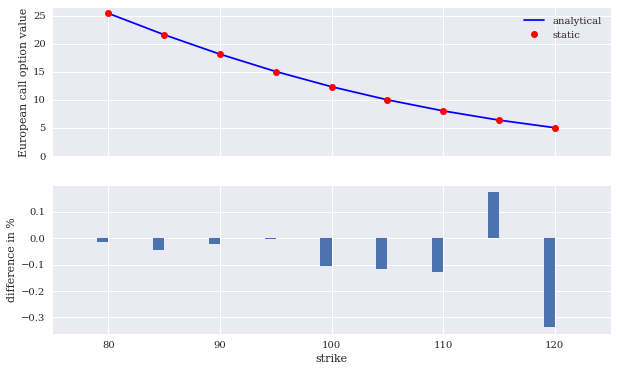

In [112]:
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);
# plt.savefig('../../images/ch12/stoch_15.png');

## 这个图是将BSM算出的9个点的value用蓝线平滑的连起来，而红点是静态的value点。
## 下面的bar图就是两个中间误差的百分百(因为数学公式算出来的基本上可以算是最精确的值)，
## 有两种：BSM值 - 静态值/BSM值；BSM值 - 静态值/静态值(第二种更加多见)。

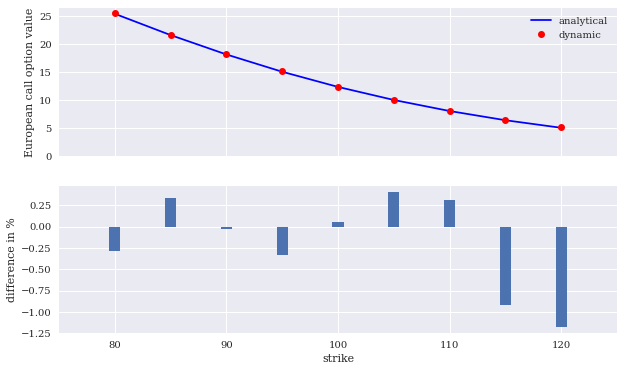

In [113]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);
# plt.savefig('../../images/ch12/stoch_16.png');

## 第一个图是将静态值和BSM值对比，第二个图是将动态值和BSM值对比
## 都是比较出与完美解的差距，整体上动态的残差会更大，因为动态当中设了很多区间，而每次区间S0变化的时候可能会带来一定的误差。

# American Options美式期权

## 和欧式相比，美式最大的特点就是可以在到期之前的任意一天要求行权，所以通用的计算美式期权获利的方法就是二叉树(每一个节点nodes都有行权和不行权)或者finite difference有限差分法(解矩阵)

## 期权的收益，取决于标的资产价格的波动路径，而不仅仅是到期日的资产价格，这样的期权被称为路径依赖期权(path-dependent option)。
## 美式期权就是一种路径依赖期权，因为可以随时行权，所以价值将随着标的资产价值的变化而变化；亚式期权，也称为平均期权，是另一种类型的路径依赖期权，因为它的收益是基于合同期内标的资产的平均价格。
## 因此实际上路径依赖期权的价格可以近似于股价(标的资产)本身的波动曲线，所以可以适用于蒙特·卡罗方法(monte carlo),计算随机数。
## 但是美式期权在一开始不适合使用蒙地卡罗，因为模拟出的曲线是单一的，所以没有没法通过比较来确定在哪个时点上适合行权，所以早期关于美式定价的研究是划分出其他路径依赖期权之外的，主要还是使用二叉树和finite difference。但是这两种方法在路径依赖期权上都不适合，而从定义上，美式期权就是一种路径依赖期权，所以用这两种方法来定价美式期权的效果都不好。
## 使用蒙地卡罗尽可能做出美式期权定价:参考文献:Valuing American Options by Simulation:A Simple Least-Squares Approach 

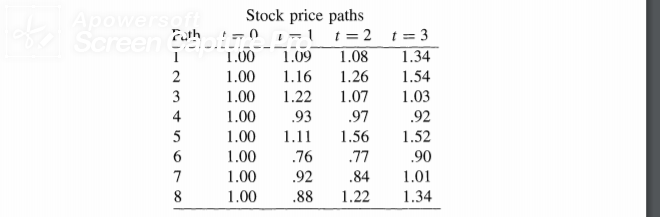

## 设置的行权价格是1.1；第3期的美式期权和欧式是一致的，都到最后一期行权

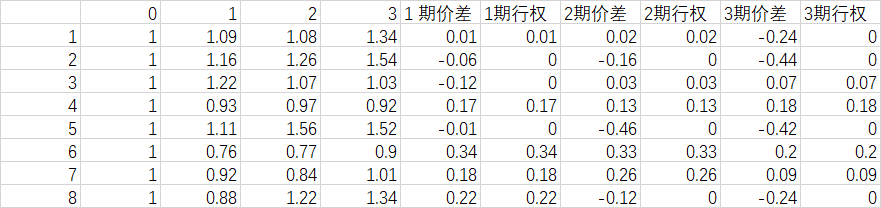

## 美式期权只能在到到期日之前选择是否行权，不能选择是否不行权，如果选择不行权就直接顺延，只有到到期日才能选择不行权(也可以选择行权，那就和欧式期权结果一样了)。
## 行权就代表期权的终结，也代表获取/卖出(call/put)资产(股票)的行为的结束，所以持有期权而不行权是对市场的价值的预测有充足信心。
## 都希望以高价卖出(put),低价买入(call)。所以如果市场的走势就是在预期卖出时高价，预期买入时低价，就不需要期权行权了，到到期日选择放弃行权就行了。
## 所以对于卖出就关注价内的情况，而对买入就关注价外的情况，其他情况就都可以顺延到到期日，然后选择放弃期权。
## 对于卖出价内和买入价外的情况需要确定具体行权的时间，这也就是下面研究的方法:从最后一期往第一期倒推行权的时间。

## 研究使用离散化，模拟出每年的价格，和1.1对比，比1.1小的可以行权(价内)，比1.1大的不行权(价外)(卖权put)

## 从第3期往前推导，只考虑第2期价内的情况(比1.1小)，是否提前行权(考虑到未来是否继续降价，从而获利更多/规避更多风险)，用1.1的价格来卖出资产(在2期看行权是获利的)，所以做了一个在第2期可能需要行权的5条股价，未来第3年行权折现到第2年的获利值Y和第2年股价X之间的regression回归。看这些在第2期可能需要行权的期权在第3期是否需要行权和行权规避风险的情况/通过期权获利的大小。

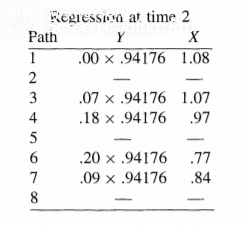

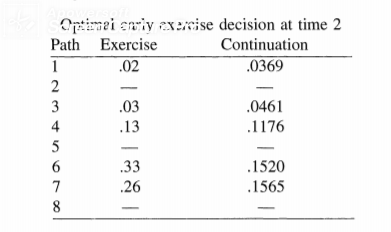

## 对拟合出来的函数式再带入X的值获得了fitted values，就是站在时点2继续持有这5个资产的价值，另一列就是现在行权的获利情况(规避风险的情况)，将这两个值对比，如Path1，继续持有的价值比现在行权的价值高就选择继续持有，反之就立即行权。

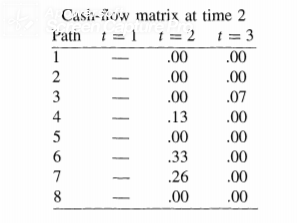

## 这就得到了结论第4，6，7条需要提前执行，其他还是在第3期再执行，所以单独从行权获利的角度获得了这张表，因为4，6，7条已经在第2期的时候提前行权了，所以第3期的行权获利值数列里面需要扣除。

## 下面就重复步骤，推导出在t1时候行权的Path，先看t1的时候那些Path在价内(<1.1),发现1，4，6，7，8是在价内，接着推导出用来做Regression的Y(在t2行权的获利折现)和X(t1的股价)。

## 为了不高估行权的获利值，所以第2期用来折现的获利值用的是是基于第二期的真实获利数值，而不是基于估计的在2期行权可能的获利情况(fitted values/继续持有资产的价值)，对于Path1：是用0，而不是0.369；对于Path4是0.13，而不是0.1176。

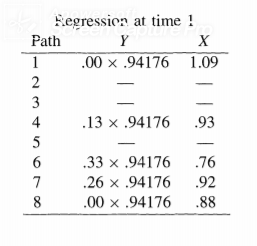

## 再继续进行regression，然后获得fitted values(站在时点1继续持有option的获利情况)，再和在1期就行权的获利值做比较，决定是否提前执行。

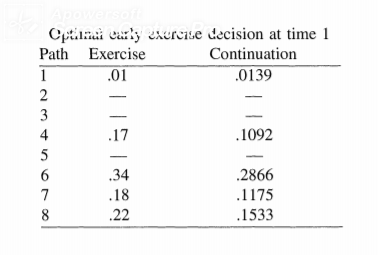

## 看出4，6，7，8的t1获利值比继续持有的获利值高，所以4，6，7，8在t1就行权了，而1还是没有行权。

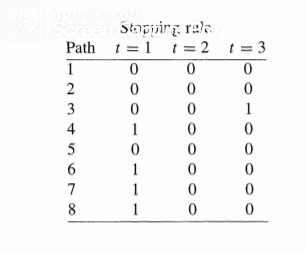

## 上面就是这个3期的美式期权的行权图，0代表不行权(未来可期，价格会走高，不重要通过期权行权获利，可以在到期日选择不行权，用市场价获取更高利润)，1代表行权(需要行权，以1.1的价格卖出资产，在第n期会出现当前行权获利比到下一个时期获利更高的情况(已经考虑了折现的问题)，就在当期行权，获得利润)。
## 4，6，7，8和t2期间的要求行权Path相同，所以提前，改到t1就行权，t2期间就不存在行权的情况了。
## 整个过程是从3到1期倒推行权机会，但是从1到2或者从2到3确定是否行权的(可能存在连续几期都是价内，但是因为增长态势好，未来在t3的时候也没有行权的情况，如Path1，在1，2两期里面都是价内，但是对比出的持有(不行权)的价值比兑现的价值高的结果，所以一直都是持有，虽然是价格内，但是一直不行权)

## 最后将所有t1和t3的利润折现到t0期，分别折现1年和3年，结果是0.1144，从定价者角度就是这份期权可以再在1.1的基础上再提高到1.2144。完成了对于美式期权定价问题的解决。 

In [124]:
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = math.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * math.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * np.mean(V[1])
    return C0

In [128]:
I

50000

In [130]:
gbm_mcs_amer(110, option='call')

7.80855772618613

In [129]:
gbm_mcs_amer(110, option='put')

13.630510076388125

In [127]:
df = math.exp(-r * dt)
df

0.999000499833375

## dt还是1/50年，df是折现率，先和欧式一样做一个51 * 50000的0矩阵，还是和欧式一样带入股价计算公式，先将0矩阵里面填入答案数组，然后用option='call'来确定是买权还是卖权，将矩阵和输入的K值(行权价)相减，结果进入h这个矩阵里面。
## range(M - 1, 0, -1)是从49到1，将50排除，因为50是末期，末期的结果就是欧式期权的结果(不需要考虑提前行权的问题)，49到0(不包括0)，每次-1减少1，直到1.
## V = np.copy(h)将h的数值复制给V。
## reg = np.polyfit(S[t], V[t + 1] * df, 7)是用S的多项式来做regression，X是S在49个时期(不包括最后一期)按loop从股价矩阵里面抽出的数列(S)，Y是下一期的行权获利值乘以一期的折现率，从而将获利值折现到当期(V[t + 1] * df). df使用的是连续增长率折现一期。np.polyfit就是拟合多项式的函数，获得各项多项式的参数，7代表要拟合成的是7次多项式。
## C= np.polyval(reg, S[t])是计算多项式结果的函数，前面是算出的参数，后面是要计算的自变量X。
## np.where相当于是if，前面是条件，后面是返回为True和False的分别输出值:V[t + 1] * df, h[t]
## C > h[t]就是看继续持有点价值和现在执行的价值哪一个高，所以V[t]一列就是变成本列数据或者是后一期数据折现到当前。


## 实现方法上有点像动态的欧式期权计算，和前面paper做的蒙地卡罗方法不同是，paper里面仅仅是对于价内的Path做提前行权的计算，而上面函数里面是对所有的1到49期的期权都做了这样的比较；第二个是paper里面是对下一期确实行权就能够获利值的折现，而V[t + 1] * df是对期望价值行权的折现, V[t + 1]本身是上一次loop获得的结果，和下一期获利值不同；

## 上面的程序结合了二叉树和蒙地卡罗方法，在每一个节点来决定是否提前行权，如果行权就获得在这个节点的获利值，而如果选择不行权，会把这一点上的价值改为继续持有的价值(fitted values基于函数预测)。一致这样替换，推到第1期，再将所有迭代出来的50000个Path做平均，同时折现一年到第0期，就是签立期权合同日的时间，获得在K行权价之下，通过美式期权还能够获利多少。
## 但是改为继续持有的价值往往比当期行权的价值要高，这种替代会造成结果整体上是要大于实际上的用实际行权价值算出来的结果。

In [131]:
gbm_mcs_amer(110., option='call')

7.802327037668727

In [132]:
gbm_mcs_amer(110., option='put')

13.643716591883065

In [133]:
euro_res = []
amer_res = []

In [134]:
k_list = np.arange(80., 120.1, 5.)

In [135]:
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))

## 还是和欧式的方法一样，最后回归到比较方法间的差异，统一都是比较期权在put或者call下面期权的获利值。

In [136]:
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

In [137]:
euro_res

array([ 1.5094,  2.4154,  3.7702,  5.4284,  7.4117,  9.9061, 12.6185,
       15.7899, 19.1848])

In [138]:
amer_res

array([ 1.509 ,  2.4963,  3.8589,  5.667 ,  7.8806, 10.5295, 13.6444,
       17.2259, 21.1426])

## 总体上看美式期权获利值要大于欧式期权，因为美式可以选择行权的日期，但是差别不大，因为不管是什么时期卖出，实际上期权获利值是在一定区间的(只要所以的Path都会归于欧式期权的形式(最后一期不行权的，在之前也不会行权))。

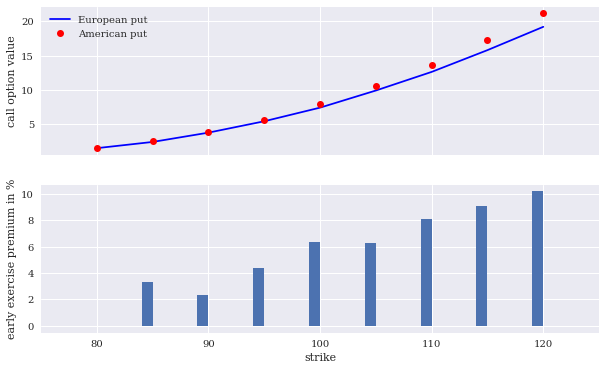

In [139]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125);
# plt.savefig('../../images/ch12/stoch_17.png');

## 第2个子图，看美式比欧式增加的比例，看出来有5%左右的增加。

# Risk Measures风险值

# Value-at-Risk VaR，假定的市场条件下，在一定的时间段内，给定置信水平(confident:X%)a下的在险价值，即可能的损失上限。预期的最大损失量(可以是绝对值，也可以是相对值)。
## VaR is the loss level that will not be exceeded with a specified probablity.

## 还是可以将VaR归结为概率问题，置信区间是发生损失小于VaR的所有其他可能占总可能性的百分比比值(这种可能里面包括不损失和损失小于VaR的情况)，而1 - 置信区间的百分比就是发生小概率事件，出现超出VaR设定的数值损失的概率。
## 所以说，可以给定置信区间来求VaR，也可以给定VaR来求置信区间(前提是在同样的市场条件和时间段内)

## 某一投资公司持有的证券组合在未来24小时内，置信度为95%，在证券市场正常波动的情况下，VaR值为520万元，其含义是指，该公司的证券组合在一天内(24小时)，由于市场价格变化而带来的最大损失超过520万元的概率为5%，平均20个交易日才可能出现一次这种情况。或者说有95%的把握判断该投资公司在下一个交易日内的损失在520万元以内。5%的几率反映了金融资产管理者的风险厌恶程度，可根据不同的投资者对风险的偏好程度和承受能力来确定。

## VaR提供的是小于VaR这个设定的level的情况的总概率是置信区间X%，但是对于超出VaR的部分没有定义，不清楚具体最大的损失和其发生的概率。
## 一定程度上，在置信区间设定的非常靠近1，同时市场正常，对于极小概率发生的极大额度的损失几乎无可能出现(少发生极端状况)，就可以将VaR的值认定为最大损失情况。
## 但是实际上，只有在市场极端的时候risk measures工具才会显现最大价值，平时往往不会重视，但是VaR却在这种极端市场上难以发挥作用来框定risk的最大边界，所以后面又有研究其它方法来适应，但是VaR还是风险估计的基础方法。

## 近似于用标准正态分布来模拟需要研究风险的资产价格变化，95%的置信区间的VaR实际上就是去除右边为正(盈利的一侧)，而另一侧是算从0到45%所有负数部分面积的点，在这个点向左是5%的超出VaR估计的更大的亏损可能，而点往右是95%的在VaR估计之内的亏损水平出现的情况和盈利的情况。
## 所以对于VaR要聚焦在50%的亏损部分，负半轴(左半轴)。

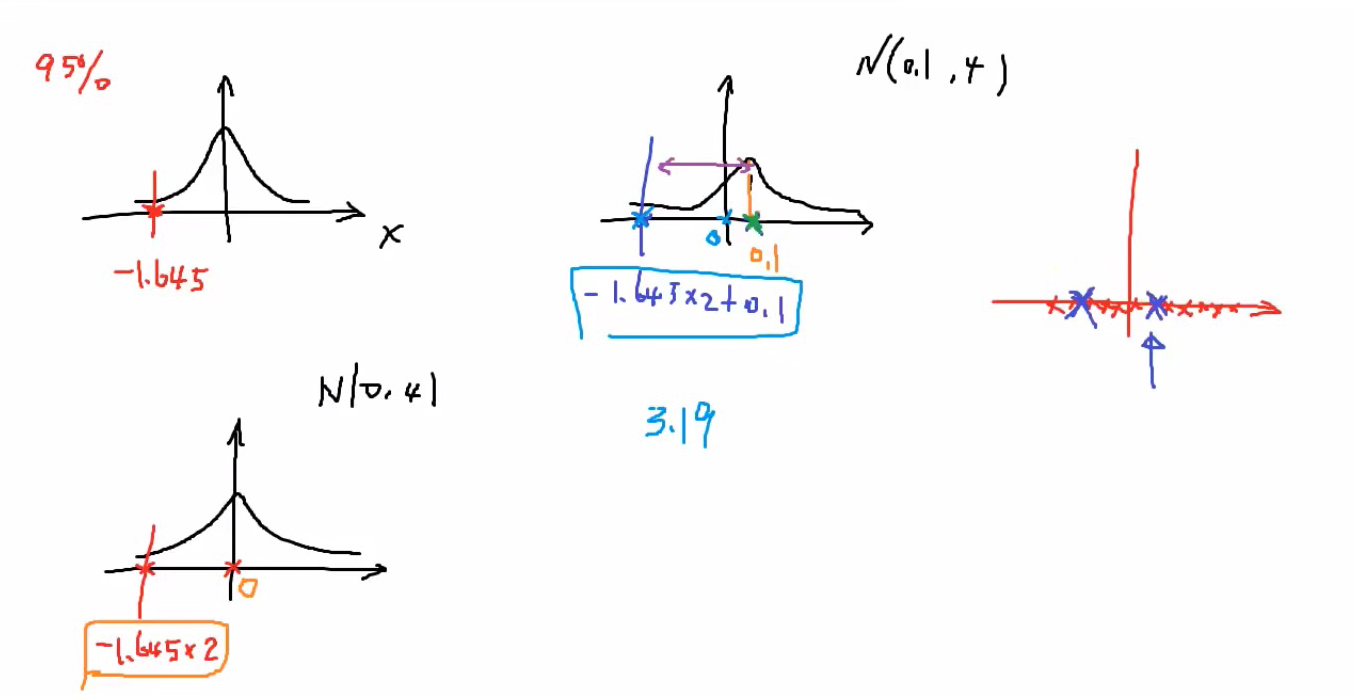

## 1.645是在标准正态分布情况下5%分位的数值：如果是方差变化，就是将5%分位点X值乘以方差的根号(std标准差)；如果是mean变化，就把X值加上改变之后mean的值(因为亏损值，所以最后都会加一个符号，变成数值形式，应该在所有变化结束之后)；要点：如果有正态分布的表达式在方差和mean上都需要变化的(不是0和1), 先变方差,再变mean。
## 对于蒙地卡罗模拟的方式来获得95%置信区间的VaR，可以先将50000多个点画出来，然后从最小(左边)到最大(右边)方向找5%分位，找到以后和做出的mean(平均值而不是中位数或50%分位数)，用.mean()的函数算出来，然后通过和mean对比，获得VaR的水平(百分之多少的mean或者和mean差多少绝对值，因为mean代表了期望值).p.s.期望值(mean)可能是当期的，也可能是多期后折现的。

In [140]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

In [141]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
             sigma * np.sqrt(T) * npr.standard_normal(I))  

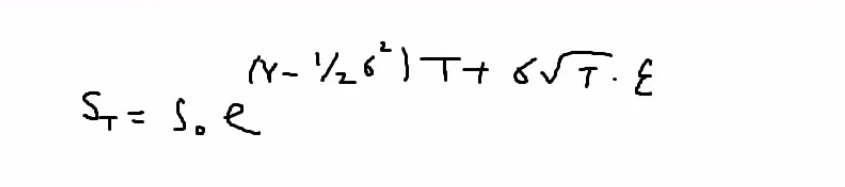

## 实操中使用的r是股票的真实利率，而在研究中r是设定在风险中立情况下的无风险利率

In [142]:
ST

array([98.6329, 92.9305, 99.9465, ..., 98.2276, 91.8574, 93.4686])

## ST就是股价的数组矩阵。

In [144]:
R_gbm = np.sort(ST - S0)  

In [145]:
R_gbm

array([-21.3935, -21.2864, -21.2198, ...,  28.8626,  29.8046,  31.5823])

## np.sort是将数组从小到大排起来
## R_gbm现在就是一个月(利率用的是年利率，所以时间就表达为：30/365)后股价的获利或者亏损情况，ST - S0期末减期初。

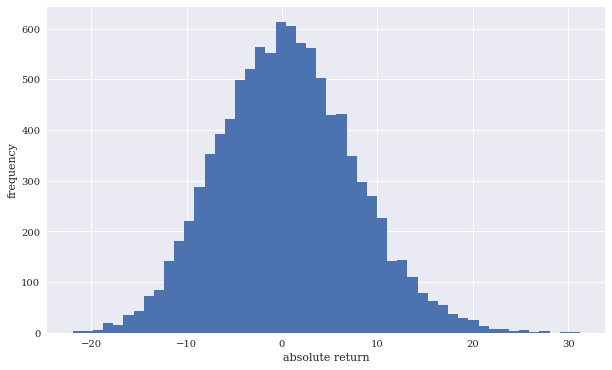

In [89]:
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_18.png');

## 画图可知，和理论预测的一致，股票的盈亏数组是符合正态分布的特征的。

In [146]:
import warnings
warnings.simplefilter('ignore')

### 没啥用

In [148]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           21.286
           99.90           19.760
           99.00           15.328
           97.50           12.883
           95.00           10.863
           90.00            8.545


In [149]:
scs?

## scs是scipy.stats数学统计的模块
## scs.scoreatpercentile(数据集，需要找出的分位数)；percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]代表需要找出0.01%, 0.1%, 1%., 2.5%, 5.0%和10.0%的共6个分位数，可以反过来推导出6个从大到小的置信区间X%。
## zip将置信区间和VaR的值一一对应。

In [155]:
dt = 30. / 365 / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [156]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * math.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

## 模拟出现jump跳跃的情况，和上面一个函数就算出不同，下面需要考虑期间(dt为1/365,一个月里面的每一天都是一个期间)，离散化之后会是一个 31 * 10000的股价矩阵(第一列是S0当期的股价)，通过loop的方式计算股价，带入跳动股价的计算公式，这章里面没有定义的mu,delta,rj都是之前算出或者设定过的，直接拿来使用。
## S[t] = np.maximum(S[t], 0)因为是设定的是负面的跳动，所以存在可能性出现负数的股价(不是负数的盈利，股价本身最多为0(破产，退市))，为了防止出现所以需要maximum来剔除负数的结果。

In [157]:
R_jd = np.sort(S[-1] - S0)

## R_jd是盈亏值按大小排列。

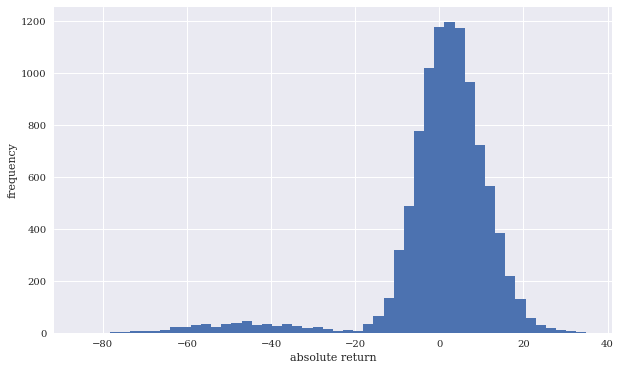

In [158]:
plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_19.png');

## 从图中看出分布呈现出左侧(负数轴)长尾的现象，长尾的原因是跳跃使更多的股价变成了小于S0：100的数。

In [159]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           78.058
           99.90           73.228
           99.00           57.413
           97.50           46.157
           95.00           21.798
           90.00            8.859


## 看出在6个不同置信区间的VaR是差距巨大的从78.058到8.859。
## 从某种意义上，jump的加入是更加符合现实的股价波动情况，实际上也存在在置信区间提高很小的值，但是VaR增加巨大(更大程度上的保障，也会极大的提高风险的最高水准)。在这种市场状态下，可能需要提前考虑出现78.058(股价几乎赔完)的可能。

In [165]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs) 
jd_var = scs.scoreatpercentile(R_jd, percs) 

## arange(0.0, 10.1, 0.1)从0到10.0(不包括10.1)每隔0.1一抽取，gbm_var和jd_var分别算出来的是在给定的percs下得出的VaR。

Text(0, 0.5, 'value-at-risk')

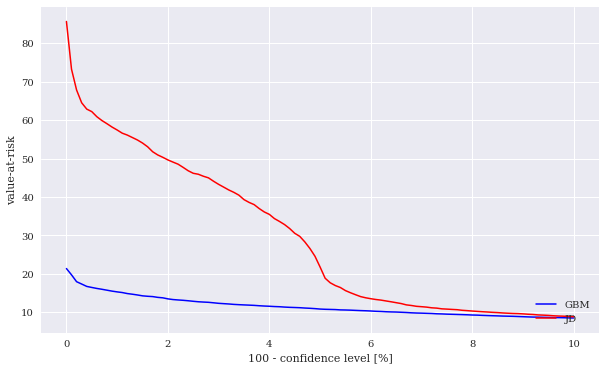

In [168]:
plt.figure(figsize=(10, 6))
plt.plot(percs, -1 * gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, -1 * jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
# plt.savefig('../../images/ch12/stoch_20.png');

## 图体现的是随着置信区间的减小(percs值的增加)，VaR的值是随着减少的。
## 同时，明显JD(jump后的)是有更加高的VaR，在percs值为0的时候达到了接近100(后尾分布的情况)，同时JD的降低也是更加迅猛的，在percs值大致在5的位置开始放缓，到percs值为10的时候基本上和GBM持平。
## 说明最后VaR还是会回归到大致一致情况。
## 对于可能产生后尾的数据(金融数据，收入等经济学数据和社科研究的大样本数据都会出现两边的极端情况实际上是有较大概率出现的)，蒙地卡罗是比较合适的方法，因为可以通过点的模拟体现出这些性质，而不是直接套模型，可能会忽略掉这部分的数据特征。

# Credit Value Adjustments信用价值调整

## CVA/DVA是对金融产品记账时候，对于考虑到客户的信用对借出金融产品，比如investment进行价值调整（Credit Value Adjustments）；同时对于借入的金融产品进行价值调整，比如borrowing，这个就是(Debit Value Adjustments)。会计上，这些都会计入其他综合受益（OCI)
## CVA是因为交易对手信用恶化而引起的预期损失，是投资组合价值与无风险投资组合价值之间的差额，是各期预期损失之和：CVA=PV-PVrisk-free。信用价值调整CVA反映交易对手信用状况恶化，信用利差扩大，导致银行衍生交易发生损失的风险。
## 美式叫法是「债务价值调整」（debit valuation adjustment ,DVA），即是容许银行在信贷质素下降时，债务以市值记帐，从而取得帐面盈利。英国则以「债务公允值」（fair value accounting of own debt）称之(类似于坏帐计提)，字面解释则是银行调整盈利，以反映债务市值，亦即是可以用折让价于市场回购债务的实际价值。

## [违约情况](https://www.sohu.com/a/211734340_678922)

## 自然情况下，金融衍生品的两方都会按照合同履行约定，但是如果其中一方出现信用恶化的情况，进一步右倒闭的可能，自然就出现了法律都无法强制执行合同的违约。
## 那么投出去的金融资产就可能到期收不回来，然后产生亏损，如果出现这种可能，需要早做准备，提前估计好到期可能因为无法行权或者是全部行权而产生的损失，提前计提损失。(有点像对应收和应付的坏账准备)

## DVA则是相反，公司是借入方，因为我方信用恶化(如现金流断裂，重大损失)而引起的可能进行的违约可能性，在预计我方没有履约能力的情况下，提前估计放弃履约的收入。

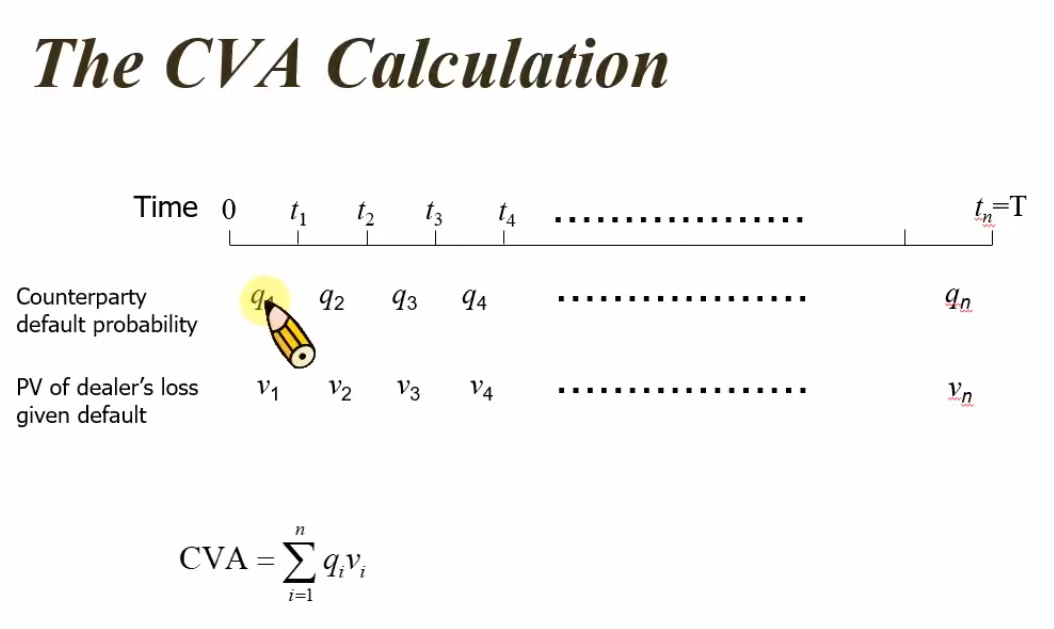

## CVA的计算就是加总在今后各期交易对手default违约的可能性乘以在各期违约(倒闭)后可能损失的PV(现值)， 可能性相加小于等于1(通常是比较小的概率，因为通常会基于未来有一定的风险，但是并不是一定会倒闭，如果说为1的话就是未来一定会倒闭，就可以直接按损失来估计了，而不需要那么麻烦)，所以算出的是在时间加权下的损失的现值，也是最可能的损失值。
## DVA就是自己default违约(如倒闭)在期间的机率乘以对方可能因为我方违约而造成的损失的PV(现值)，然后再加总，是我方因为违约而获得的收益。

## 下面模型做的是CVA，即对方违约的情况

In [197]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

In [198]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

## 还是先按股价模型，先算出股价

In [199]:
L = 0.5  

## L是当交易的对方违约后，我方会损失多少(50%): 1 - recover rate恢复率

In [200]:
p = 0.01  

## 就是CVA公式里面的q, 一年内对方违约的概率，年化的年违约率(mean值/期望值)

In [201]:
D = npr.poisson(p * T, I)  

## 通过poisson珀松分布来具象化在每个时点上是否违约(0,1),poisson(p * T, I): 前面的是年化后的平均值(λ,珀松分布的平均数，所以需要 * T，转换为1年时间里面发生的所有情况的均值)；后面是总共生成多少个符合珀松分布的数。

In [202]:
D

array([0, 0, 0, ..., 0, 0, 0])

In [203]:
D = np.where(D > 1, 1, D)  

## 将D里面可能存在的2之类的数替换为1，所以确保如果破产(违约)一次就结束了，没有第二次的可能。

In [204]:
math.exp(-r * T) * np.mean(ST)  

99.99501497882287

## 未来股价折现一年之后的结果math.exp(-r * T) * np.mean(ST) 和S0基本一致，获得当期的价格，只不过绕了个弯，实际上就是S0，反向验证了拟合结果是正确的。
## 同时如果市场没有很多同种商品的交易价格(一定要是市场价格，而不是交易双方进行的单笔交易价格):缺少市场公允价值(fair value)，可以用当期的交易价格(合同价格)把ST的股价先模拟出来，再折现到S0的时点(考虑到了市场条件，从某种程度上也是市场产生的价格，所以可以用来替代公允价格)。
## 后面S0或者折现回来的价格就可以作为CVA的对比项，

In [205]:
CVA = math.exp(-r * T) * np.mean(L * D * ST)  
CVA  

0.5295436294810607

## CVA在一年后的情况，没有离散化，100000条股价乘上100000个数的珀松分布D(这100000条里面有的发生了违约(1)，有的没有(1)，对于这100000个数的平均数是0.01,发生违约的可能性是0.01)再乘上可能损失掉的百分比L:50%(发生违约就会损失掉一半的St股价)。

## 结果和之前公式里面的CVA是一样的，一直不过因为公式里面没有引入蒙地卡罗的方法，所以需要给每个时点

In [206]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)  
S0_CVA  

99.46547134934183

In [207]:
S0_CVA = np.mean((1 - L * D) * S0)  
S0_CVA  

99.4705

In [208]:
S0_adj = S0 - CVA
S0_adj  

99.47045637051895

## 经过调整后的S0_adj, 在S0的基础上减去CVA，同样也可以一步到位，np.mean((1 - L * D) * ST直接模拟出和恢复率(1 - L)挂钩的S0_CVA 
## 两个值都可以:折现后的ST和S0，分别代表标的资产市场不活跃和市场活跃的情况

In [209]:
np.count_nonzero(L * D * ST)  

1059

In [210]:
np.count_nonzero(D)

1059

## 看到底模拟出有多少违约，珀松分布
## 得出任何模拟出的数组和期望的数组是有一定的差距的，possion设定的平均值为0.01，应该是有0.01 * 100000 = 1000个1，其他都是0, 但是实际上出现的有1059个1，超出之前设定的值，但是在一定范围内，不太会对结果产生巨大影响。

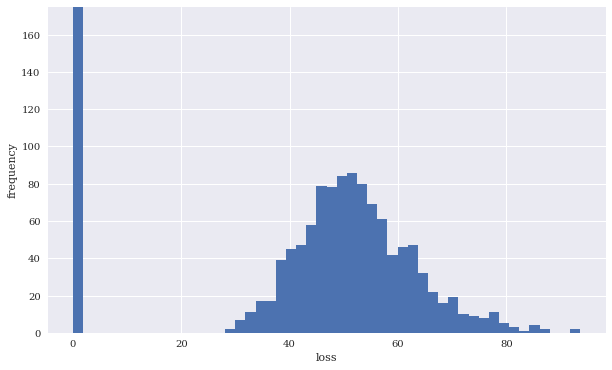

In [211]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175);
# plt.savefig('../../images/ch12/stoch_21.png');

## 结合了possion分布和正态分布，大多数情况下都不会产生违约(possion的值为0)，而少部分情况下出现违约，因为是基于ST(股价函数的结果)，mean为105 * 0.5 = 52.5，大致在这个值左右聚集。
## ymax=175能让非0部分显示出来。

In [218]:
K = 100.
hT = np.maximum(ST - K, 0)

In [219]:
C0 = math.exp(-r * T) * np.mean(hT)  
C0  

10.444062661818199

In [225]:
CVA = math.exp(-r * T) * np.mean(L * D * hT)  
CVA  

0.05429821514598403

In [221]:
C0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * hT)  
C0_CVA  

10.389764446672215

In [226]:
C0 - CVA

10.389764446672215

## 假设行权价格为100(实际上不可能，因为和S0价格一致，通常是要比S0价格高一部分(这一部分是期权的价值))。
## 然后进行对CVA的调整，算出CVA(之前是以股权做CVA的模拟，实际上不太会出现，因为股价受类似违约情况(如破产)会非常敏感，不需要通过这个来调整，但是提供了理论框架)，使用的是hT,就是期权的价值，如果确立交易的对方违约，这个期权就会作废，期权价值会出现损失(只考虑期权的那一部分，不考虑标的物价值的部分，因为劵/货或钱实际上有一方是在我们手上的，所以对于标的物S0时点上市场公允价值(fair value)的那一部分不会计入损失)，如50%(一般会直接清0，可以转手出去，对于这个期权能够转手后获得的部分就是恢复率，1 - 恢复率就是损失率)。站在S0的时点上，通过概率来估计可能因为交易对方破产等违约带来的损失，提前计算在期权的估值里面。

In [227]:
np.count_nonzero(L * D * hT)  

604

In [228]:
np.count_nonzero(D)  

1059

## 期权CVA计算里面会出现比possion模拟出来更多的0，因为期权的收益当中会有很多为0，就是不行权，因为市场走势良好，不需要通过期权来保障。
## 这部分0和possion的0部分重合，另外也存在0 * 1 = 0的情况(possion分配的是1，但是期权本身价值为0)。数据结构上看，股价本身就是升值一半跌一半的正态分布，所以行权的可能性也就是大致一半：44123，所以直接看CVA当中为0的次数，实际上是低估了可能的对手违约的次数。

In [229]:
I - np.count_nonzero(hT)  

44073

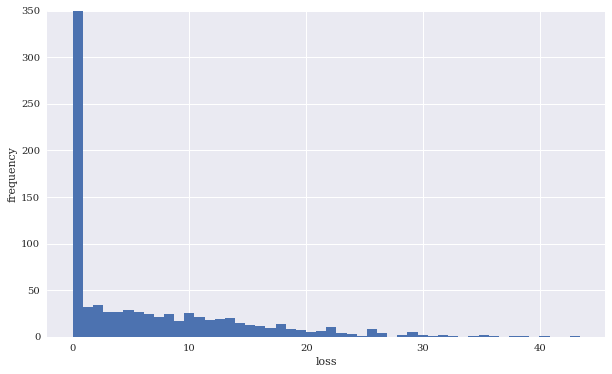

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=350);
# plt.savefig('../../images/ch12/stoch_22.png');

## 因为期权根本上还是权利于义务不对等的金融商品，相当于是保险服务，服务费没有在模型里面考虑，实际上还是通过支付服务费来获取未来风险的规避。明显看出loss向0的方向聚集，因为期权本身就存在规避风险的属性。

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>